# 1. Importing Libraries

In [1]:
#essential libraries
import re
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.utils import resample

#Geospatial libraries
import geopandas as gpd
import geoplot
from shapely.geometry import Point, Polygon
import geoplot.crs as gcrs

#ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#metrics
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV

#Time-series
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 2. Reading Data

Firstly, we read data into a dataframe and carry out a few initial investgations such as:
    
    1. Top rows
    2. Bottom rows
    3. Nulls
    4. Data types
    5. Dataframe shape 
    6. An initial glance at how values are distributed. 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.



Let's check the top rows:

In [0]:
df.head().transpose()

0  ...              4
Accident_Index                               201301BS70003  ...  201301BS70009
Location_Easting_OSGR                               527060  ...         525450
Location_Northing_OSGR                              177970  ...         178660
Longitude                                        -0.171402  ...      -0.194332
Latitude                                           51.4864  ...        51.4929
Police_Force                                             1  ...              1
Accident_Severity                                        2  ...              3
Number_of_Vehicles                                       2  ...              2
Number_of_Casualties                                     1  ...              1
Date                                            02/01/2013  ...     04/01/2013
Day_of_Week                                              4  ...              6
Time                                                 09:08  ...          17:47
Local_Authority_(District)                              12  ...             12
Local_Authority_(Highway)                        E09000020  ...      E09000020
1st_Road_Class                                           3  ...              3
1st_Road_Number                                       3217  ...           3220
Road_Type                                                6  ...              2
Speed_limit                                             30  ...             30
Junction_Detail                                          3  ...              3
Junction_Control                                         4  ...              4
2nd_Road_Class                                           6  ...              6
2nd_Road_Number                                          0  ...              0
Pedestrian_Crossing-Human_Control                        0  ...              0
Pedestrian_Crossing-Physical_Facilities                  0  ...              0
Light_Conditions                                         1  ...              4
Weather_Conditions                                       1  ...              1
Road_Surface_Conditions                                  1  ...              1
Special_Conditions_at_Site                               0  ...              0
Carriageway_Hazards                                      0  ...              0
Urban_or_Rural_Area                                      1  ...              1
Did_Police_Officer_Attend_Scene_of_Accident              1  ...              1
LSOA_of_Accident_Location                        E01002844  ...      E01002851

[32 rows x 5 columns]

Let's check the bottom rows:

In [0]:
df.tail().transpose()

138655         138656  \
Accident_Index                               2013984141713  2013984142113   
Location_Easting_OSGR                               338942         319657   
Location_Northing_OSGR                              576352         566743   
Longitude                                         -2.95789       -3.25718   
Latitude                                           55.0779        54.9888   
Police_Force                                            98             98   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       3              2   
Number_of_Casualties                                     2              2   
Date                                            22/12/2013     31/12/2013   
Day_of_Week                                              1              3   
Time                                                 11:36          12:35   
Local_Authority_(District)                             917            917   
Local_Authority_(Highway)                        S12000006      S12000006   
1st_Road_Class                                           3              6   
1st_Road_Number                                          7            947   
Road_Type                                                6              6   
Speed_limit                                             60             30   
Junction_Detail                                          5              3   
Junction_Control                                         4              4   
2nd_Road_Class                                           4              6   
2nd_Road_Number                                       6357            946   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  0              0   
Light_Conditions                                         1              1   
Weather_Conditions                                       1              1   
Road_Surface_Conditions                                  2              2   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      2              2   
Did_Police_Officer_Attend_Scene_of_Accident              1              1   
LSOA_of_Accident_Location                              NaN            NaN   

                                                    138657         138658  \
Accident_Index                               2013984142213  2013984142413   
Location_Easting_OSGR                               308499         316727   
Location_Northing_OSGR                              605253         569114   
Longitude                                         -3.44395       -3.30365   
Latitude                                           55.3328        55.0096   
Police_Force                                            98             98   
Accident_Severity                                        3              2   
Number_of_Vehicles                                       1              3   
Number_of_Casualties                                     1              3   
Date                                            31/12/2013     31/12/2013   
Day_of_Week                                              3              3   
Time                                                 10:59          13:59   
Local_Authority_(District)                             917            917   
Local_Authority_(Highway)                        S12000006      S12000006   
1st_Road_Class                                           3              5   
1st_Road_Number                                        701             49   
Road_Type                                                6              6   
Speed_limit                                             30             60   
Junction_Detail                                

Let's first explore how many missing values (nulls) we have in the data set

In [0]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              8
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

Except for the column 'LSOA_of_Accident_Location' which has 9764 nulls and Time column which has 8 nulls, we do not have any missing values in any other column. 

Let's check the shape (no. examples and features) of the dataframe:

In [0]:
df.shape

(138660, 32)

Let's check the data types:

In [0]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

We need to convert the data type of column 'Date' to datetime data type:

In [0]:
df['Date'] = pd.to_datetime(df["Date"],format='%d/%m/%Y')

In [0]:
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

In [0]:
df.head().transpose()

0  \
Accident_Index                                     201301BS70003   
Location_Easting_OSGR                                     527060   
Location_Northing_OSGR                                    177970   
Longitude                                              -0.171402   
Latitude                                                 51.4864   
Police_Force                                                   1   
Accident_Severity                                              2   
Number_of_Vehicles                                             2   
Number_of_Casualties                                           1   
Date                                         2013-01-02 00:00:00   
Day_of_Week                                                    4   
Time                                                       09:08   
Local_Authority_(District)                                    12   
Local_Authority_(Highway)                              E09000020   
1st_Road_Class                                                 3   
1st_Road_Number                                             3217   
Road_Type                                                      6   
Speed_limit                                                   30   
Junction_Detail                                                3   
Junction_Control                                               4   
2nd_Road_Class                                                 6   
2nd_Road_Number                                                0   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        0   
Light_Conditions                                               1   
Weather_Conditions                                             1   
Road_Surface_Conditions                                        1   
Special_Conditions_at_Site                                     0   
Carriageway_Hazards                                            0   
Urban_or_Rural_Area                                            1   
Did_Police_Officer_Attend_Scene_of_Accident                    1   
LSOA_of_Accident_Location                              E01002844   
Datetime                                     2013-01-02 09:08:00   

                                                               1  \
Accident_Index                                     201301BS70005   
Location_Easting_OSGR                                     526900   
Location_Northing_OSGR                                    178940   
Longitude                                              -0.173356   
Latitude                                                 51.4951   
Police_Force                                                   1   
Accident_Severity                                              3   
Number_of_Vehicles                                             1   
Number_of_Casualties                                           2   
Date                                         2013-01-04 00:00:00   
Day_of_Week                                                    6   
Time                                                       08:16   
Local_Authority_(District)                                    12   
Local_Authority_(Highway)                              E09000020   
1st_Road_Class                                                 3   
1st_Road_Number                                             3218   
Road_Type                                                      6   
Speed_limit                                                   30   
Junction_Detail                                                6   
Junction_Control                                               2   
2nd_Road_Class                                                 3   
2nd_Road_Number                                             3218   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        5   
Light_Conditions                                  

Let's check the distributions:

In [0]:
df.describe().transpose()

count           mean  \
Location_Easting_OSGR                        138660.0  444570.930009   
Location_Northing_OSGR                       138660.0  293777.108597   
Longitude                                    138660.0      -1.364462   
Latitude                                     138660.0      52.531577   
Police_Force                                 138660.0      30.591245   
Accident_Severity                            138660.0       2.835281   
Number_of_Vehicles                           138660.0       1.823980   
Number_of_Casualties                         138660.0       1.324607   
Day_of_Week                                  138660.0       4.114481   
Local_Authority_(District)                   138660.0     350.967395   
1st_Road_Class                               138660.0       4.070676   
1st_Road_Number                              138660.0    1012.768672   
Road_Type                                    138660.0       5.175285   
Speed_limit                                  138660.0      38.529064   
Junction_Detail                              138660.0       2.312152   
Junction_Control                             138660.0       1.806008   
2nd_Road_Class                               138660.0       2.715116   
2nd_Road_Number                              138660.0     368.979114   
Pedestrian_Crossing-Human_Control            138660.0       0.007219   
Pedestrian_Crossing-Physical_Facilities      138660.0       0.825487   
Light_Conditions                             138660.0       1.954919   
Weather_Conditions                           138660.0       1.543466   
Road_Surface_Conditions                      138660.0       1.347072   
Special_Conditions_at_Site                   138660.0       0.100663   
Carriageway_Hazards                          138660.0       0.072854   
Urban_or_Rural_Area                          138660.0       1.352849   
Did_Police_Officer_Attend_Scene_of_Accident  138660.0       1.182453   

                                                       std           min  \
Location_Easting_OSGR                         95656.846984  66435.000000   
Location_Northing_OSGR                       160901.506944  10290.000000   
Longitude                                         1.405178     -7.489410   
Latitude                                          1.448954     49.912941   
Police_Force                                     25.453417      1.000000   
Accident_Severity                                 0.400976      1.000000   
Number_of_Vehicles                                0.726114      1.000000   
Number_of_Casualties                              0.801197      1.000000   
Day_of_Week                                       1.914173      1.000000   
Local_Authority_(District)                      259.945722      1.000000   
1st_Road_Class                                    1.416495      1.000000   
1st_Road_Number                                1808.137585      0.000000   
Road_Type                                         1.629835      1.000000   
Speed_limit                                      13.946743     20.000000   
Junction_Detail                                   2.511153     -1.000000   
Junction_Control                                  2.345759     -1.000000   
2nd_Road_Class                                    3.200194     -1.000000   
2nd_Road_Number                                1268.605694     -1.000000   
Pedestrian_Crossing-Human_Control                 0.109210      0.000000   
Pedestrian_Crossing-Physical_Facilities           1.914114      0.000000   
Light_Conditions                                  1.662293      1.000000   
Weather_Conditions                                1.575366      1.000000   
Road_Surface_Conditions                           0.622899     -1.000000   
Special_Conditions_at_Site                        0.705971      0.000000   
Carriageway_Hazards                               0.628018     -1.000000   
Urban_or_Rural_Area                               0.477

# 3. Helper Functions

In [0]:
def mean(col): #function that aggeregates and shows the means
    return df.groupby(col).mean().transpose()

In [0]:
def count(col): #function to count the number of examples for each desired category
    return df[col].value_counts()

In [0]:
def violin(col1,col2): #function to visualise the violin plot
    plt.figure(figsize=(20,10))
    ax = sns.violinplot(x=col1, y=col2, hue='subscribed',split=True,data=df)
    return ax

In [0]:
def joint(col1,col2): #function to visualise the joint plot
    ax=sns.jointplot(x=col1, y=col2, data=df, kind="kde")
    return ax

In [0]:
def correlation(df,size1,size2,cmap): #function to create the correlation matrix
    corr=df.corr()
    plt.figure(figsize=(size1,size2))
    ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap=cmap,annot=True)
    return ax

In [0]:
def geo_plot(col): #function to visualise geospatial instances
    ax = geoplot.webmap(geo_df, projection=gcrs.WebMercator())
    return geoplot.pointplot(geo_df,hue=col,legend=True, legend_var='hue',ax=ax)

In [0]:
def dist_plot(col1,col2):
    g = sns.FacetGrid(df, col=col1)
    return g.map(sns.distplot, col2)

In [0]:
def count_plot(col,hue):
    return sns.countplot(x=col, hue=hue, data=df)

In [0]:
def cat_plot(colx,hue,col,h,asp):
    return sns.catplot(x=colx, hue=hue, col=col,data=df, kind="count",height=h, aspect=asp)

# 4. Initial Analysis

We now carry out some initial aggregation using the Function 'mean' defined above in the Helper Function section

Table below shows the application of mean function to 'Accident_Severity' cloumn. From the table we can deduce that:
    
1. Severity 3 has the highest mean for number of vehicles while 2 has the lowest.
2. Severity 1 has the highest mean for number of casaulties while 3 has the lowest.
3. All 3 degrees of severity have a mean around Thursday
4. All 3 degrees of severity have a mean around 5 for road type
5. Severity 1 has the highest mean for speed limit while 3 has the lowest.
6. It seems that junction detail values around value 2 has the highest accident as the mean is skewed towards that value. 
7. The mean for light_condition is skewed towards the low light (value 1) 
8. All 3 degrees of severity have a mean around 1.5 for weather condition with 3 highest and 1 lowest.
9. All 3 degrees of severity have a mean around 1.35 for road surface condition: 1 has the highest 2 has the lowest.
10. It seems that there were almost no special conditions at site for the most accident as the means are around 0.1
11. Carriageway hazards for all 3 severities is around 0.07 (skewed towards left)

In [0]:
mean('Accident_Severity')

Accident_Severity                                        1              2  \
Location_Easting_OSGR                        427741.782338  438268.057226   
Location_Northing_OSGR                       321532.770522  303219.748369   
Longitude                                        -1.611542      -1.456176   
Latitude                                         52.781272      52.617038   
Police_Force                                     36.402363      32.803098   
Number_of_Vehicles                                1.769900       1.690481   
Number_of_Casualties                              1.833333       1.403893   
Day_of_Week                                       4.053483       4.120516   
Local_Authority_(District)                      414.801617     376.295455   
1st_Road_Class                                    3.672264       4.125561   
1st_Road_Number                                1018.228856    1052.121790   
Road_Type                                         5.322761       5.337291   
Speed_limit                                      48.899254      39.889421   
Junction_Detail                                   1.500622       2.137230   
Junction_Control                                  0.729478       1.543263   
2nd_Road_Class                                    1.269900       2.381879   
2nd_Road_Number                                 213.621891     317.492102   
Pedestrian_Crossing-Human_Control                 0.002488       0.006828   
Pedestrian_Crossing-Physical_Facilities           0.551617       0.810079   
Light_Conditions                                  2.567164       2.084539   
Weather_Conditions                                1.444030       1.481095   
Road_Surface_Conditions                           1.361318       1.324093   
Special_Conditions_at_Site                        0.067786       0.114095   
Carriageway_Hazards                               0.073383       0.078068   
Urban_or_Rural_Area                               1.670398       1.419232   
Did_Police_Officer_Attend_Scene_of_Accident       1.013060       1.100082   

Accident_Severity                                        3  
Location_Easting_OSGR                        445854.685543  
Location_Northing_OSGR                       291819.028179  
Longitude                                        -1.345751  
Latitude                                         52.513876  
Police_Force                                     30.142036  
Number_of_Vehicles                                1.847030  
Number_of_Casualties                              1.304391  
Day_of_Week                                       4.114308  
Local_Authority_(District)                      345.860578  
1st_Road_Class                                    4.066960  
1st_Road_Number                                1006.117400  
Road_Type                                         5.146192  
Speed_limit                                      38.159723  
Junction_Detail                                   2.352497  
Junction_Control                                  1.864657  
2nd_Road_Class                                    2.790595  
2nd_Road_Number                                 379.710759  
Pedestrian_Crossing-Human_Control                 0.007349  
Pedestrian_Crossing-Physical_Facilities           0.831812  
Light_Conditions                                  1.924873  
Weather_Conditions                                1.555251  
Road_Surface_Conditions                           1.350717  
Special_Conditions_at_Site                        0.098869  
Carriageway_Hazards                               0.071976  
Urban_or_Rural_Area                               1.337407  
Did_Police_Officer_Attend_Scene_of_Accident       1.198539

Let's quickly check which day of week has the highest number of accident using the count function defined above:

In [0]:
count('Day_of_Week')

6    23044
3    21257
5    21186
4    20461
2    19831
7    18027
1    14854
Name: Day_of_Week, dtype: int64

Well it seems that Saturday has the highest number of accident. That's expected. However Wed is at second which is un-expected. 

Table below shows the means for the number of vehicles involved in the accidents. 
As can be seen, it seems that accident severity increases as the number of vehicles increases with some exception, e.i. when 7 vehicles were involved we have a higher mean than 8, 9 etc. 
We can also see as the mean for speed limit increases we have higher number of vehicles involved in the accident. We can also deduce from the table that we had the highest number of vehicles when the light condition was lowest (value 1). 

In [0]:
mean('Number_of_Vehicles')

Number_of_Vehicles                                      1              2   \
Location_Easting_OSGR                        439830.445736  447438.021121   
Location_Northing_OSGR                       305437.922000  288266.185687   
Longitude                                        -1.436526      -1.321417   
Latitude                                         52.636122      52.482144   
Police_Force                                     31.967096      29.502008   
Accident_Severity                                 2.767152       2.868808   
Number_of_Casualties                              1.137760       1.338776   
Day_of_Week                                       4.101043       4.116609   
Local_Authority_(District)                      363.963024     339.889226   
1st_Road_Class                                    4.299974       4.039003   
1st_Road_Number                                1007.282086    1026.603610   
Road_Type                                         5.392591       5.084182   
Speed_limit                                      38.504954      37.644761   
Junction_Detail                                   1.721468       2.666428   
Junction_Control                                  1.087368       2.268534   
2nd_Road_Class                                    1.790124       3.315362   
2nd_Road_Number                                 247.043237     444.157178   
Pedestrian_Crossing-Human_Control                 0.010168       0.006017   
Pedestrian_Crossing-Physical_Facilities           0.904559       0.827500   
Light_Conditions                                  2.219997       1.835228   
Weather_Conditions                                1.625580       1.509663   
Road_Surface_Conditions                           1.425919       1.306761   
Special_Conditions_at_Site                        0.144138       0.077291   
Carriageway_Hazards                               0.146539       0.034648   
Urban_or_Rural_Area                               1.369760       1.324218   
Did_Police_Officer_Attend_Scene_of_Accident       1.167487       1.209101   

Number_of_Vehicles                                      3              4   \
Location_Easting_OSGR                        441349.291842  445726.294577   
Location_Northing_OSGR                       291659.938653  287849.157918   
Longitude                                        -1.409724      -1.345924   
Latitude                                         52.512699      52.478614   
Police_Force                                     32.774937      33.221258   
Accident_Severity                                 2.854079       2.823861   
Number_of_Casualties                              1.722207       2.042516   
Day_of_Week                                       4.154257       4.116703   
Local_Authority_(District)                      376.357216     380.554881   
1st_Road_Class                                    3.618432       3.383080   
1st_Road_Number                                 995.162499     831.029067   
Road_Type                                         5.108551       4.947505   
Speed_limit                                      42.812588      46.685466   
Junction_Detail                                   2.121570       1.760954   
Junction_Control                                  1.383628       0.955315   
2nd_Road_Class                                    2.163248       1.536226   
2nd_Road_Number                                 320.395804     219.737093   
Pedestrian_Crossing-Human_Control                 0.005713       0.003905   
Pedestrian_Crossing-Physical_Facilities           0.609815       0.441215   
Light_Conditions                                  1.832444       1.881562   
Weather_Conditions                                1.491430       1.461605   
Road_Surface_Conditions                           1.337080       1.346638   
Special_Conditions_at_Site                        0.102744       0.115401   
Carriageway_Hazards                               0.069776       0.07809

Table below shows the mean values for number of casaulties. Interestingly, it seems that there is no correlation between number of casualities and and number of vehicles in the accident. We will explore that further later using correlations. 

There is a general trend which shows as the meanvalue for speed limit increases the number of casualities also increases. 

We have the highest number of casualties (70) when the value for the column Urban_or_Rural_Area is equal to 2. However from the data and readme file it is not clear whether 2 refers to rural or urban area. 

Another important finding here is that for all the highest values of casualties the value for the column Did_Police_Officer_Attend_Scene_of_Accident is equal to 1. As the number of casualties decreases this values increases. 

In [0]:
mean('Number_of_Casualties')

Number_of_Casualties                                    1              2   \
Location_Easting_OSGR                        446638.683360  438764.152970   
Location_Northing_OSGR                       291513.343022  299013.315667   
Longitude                                        -1.335193      -1.446598   
Latitude                                         52.511085      52.578945   
Police_Force                                     30.291688      31.654014   
Accident_Severity                                 2.844872       2.825251   
Number_of_Vehicles                                1.732333       2.068514   
Day_of_Week                                       4.110251       4.114111   
Local_Authority_(District)                      346.773345     364.771494   
1st_Road_Class                                    4.140074       3.875261   
1st_Road_Number                                1004.805824    1035.354147   
Road_Type                                         5.188097       5.135510   
Speed_limit                                      37.352938      42.001329   
Junction_Detail                                   2.309952       2.336402   
Junction_Control                                  1.849392       1.696052   
2nd_Road_Class                                    2.767976       2.578905   
2nd_Road_Number                                 365.628594     387.662175   
Pedestrian_Crossing-Human_Control                 0.007619       0.005978   
Pedestrian_Crossing-Physical_Facilities           0.862712       0.718353   
Light_Conditions                                  1.934949       1.996963   
Weather_Conditions                                1.546662       1.551623   
Road_Surface_Conditions                           1.337266       1.387645   
Special_Conditions_at_Site                        0.098056       0.108654   
Carriageway_Hazards                               0.072615       0.075346   
Urban_or_Rural_Area                               1.318697       1.460097   
Did_Police_Officer_Attend_Scene_of_Accident       1.205457       1.112687   

Number_of_Casualties                                    3              4   \
Location_Easting_OSGR                        434806.691921  431261.628758   
Location_Northing_OSGR                       307532.003520  307426.893788   
Longitude                                        -1.502245      -1.553703   
Latitude                                         52.656104      52.655113   
Police_Force                                     31.881495      31.657816   
Accident_Severity                                 2.775897       2.741984   
Number_of_Vehicles                                2.277238       2.350200   
Day_of_Week                                       4.172477       4.154309   
Local_Authority_(District)                      370.326182     368.669339   
1st_Road_Class                                    3.752598       3.667836   
1st_Road_Number                                1063.329702    1050.687876   
Road_Type                                         5.144150       5.094188   
Speed_limit                                      43.870265      44.794589   
Junction_Detail                                   2.308750       2.300601   
Junction_Control                                  1.606939       1.501503   
2nd_Road_Class                                    2.488434       2.306613   
2nd_Road_Number                                 386.227623     347.152305   
Pedestrian_Crossing-Human_Control                 0.004358       0.006012   
Pedestrian_Crossing-Physical_Facilities           0.627053       0.610220   
Light_Conditions                                  2.031009       2.205411   
Weather_Conditions                                1.485585       1.502505   
Road_Surface_Conditions                           1.369427       1.377756   
Special_Conditions_at_Site                        0.108113       0.124749   
Carriageway_Hazards                               0.057660       0.10420

Table below shows the mean values of numerical features for various days of week. A few points to note:
1. All days have similar mean values for accident severity. Tue,Wed, Thu and Friday have almost the same means.
2. All Days have similar means with regard to speed limit too. 
3. Mean value of light conditions for Mon is higher than other days. 
4. In general, mean values do not differ significantly from each other for various days. 

In [0]:
mean('Day_of_Week')

Day_of_Week                                              1              2  \
Location_Easting_OSGR                        445349.314528  445417.712672   
Location_Northing_OSGR                       294165.956510  293156.888911   
Longitude                                        -1.353056      -1.352071   
Latitude                                         52.535092      52.525860   
Police_Force                                     30.543019      30.590792   
Accident_Severity                                 2.806517       2.842872   
Number_of_Vehicles                                1.763835       1.824366   
Number_of_Casualties                              1.402720       1.304473   
Local_Authority_(District)                      350.733405     351.431950   
1st_Road_Class                                    4.010570       4.067823   
1st_Road_Number                                1009.987209    1023.684181   
Road_Type                                         5.161707       5.171197   
Speed_limit                                      39.979803      38.512430   
Junction_Detail                                   2.156523       2.312390   
Junction_Control                                  1.596809       1.794362   
2nd_Road_Class                                    2.440555       2.697696   
2nd_Road_Number                                 356.822472     385.496899   
Pedestrian_Crossing-Human_Control                 0.004915       0.006707   
Pedestrian_Crossing-Physical_Facilities           0.764441       0.837023   
Light_Conditions                                  2.174902       1.873632   
Weather_Conditions                                1.523697       1.611517   
Road_Surface_Conditions                           1.355460       1.376481   
Special_Conditions_at_Site                        0.100916       0.099440   
Carriageway_Hazards                               0.096136       0.083052   
Urban_or_Rural_Area                               1.409115       1.353235   
Did_Police_Officer_Attend_Scene_of_Accident       1.141511       1.191518   

Day_of_Week                                              3              4  \
Location_Easting_OSGR                        444599.701087  445249.540150   
Location_Northing_OSGR                       293880.739333  291181.141195   
Longitude                                        -1.364124      -1.354045   
Latitude                                         52.532513      52.508359   
Police_Force                                     30.758338      30.250721   
Accident_Severity                                 2.844381       2.844778   
Number_of_Vehicles                                1.844004       1.842627   
Number_of_Casualties                              1.291245       1.291677   
Local_Authority_(District)                      352.223644     347.774253   
1st_Road_Class                                    4.078892       4.072675   
1st_Road_Number                                1002.150256    1009.237330   
Road_Type                                         5.168368       5.177753   
Speed_limit                                      38.081573      38.152583   
Junction_Detail                                   2.360399       2.357461   
Junction_Control                                  1.884979       1.893554   
2nd_Road_Class                                    2.796585       2.824593   
2nd_Road_Number                                 370.920497     376.426861   
Pedestrian_Crossing-Human_Control                 0.010114       0.007869   
Pedestrian_Crossing-Physical_Facilities           0.849367       0.851425   
Light_Conditions                                  1.858588       1.887249   
Weather_Conditions                                1.505810       1.562387   
Road_Surface_Conditions                           1.321353       1.345096   
Special_Conditions_at_Site                        0.098226       0.100386   
Carriageway_Hazards                               0.063744       0.06221

The below charts show pair plots for numerical features hued for if police attended the scene. There is a lot to compare here, however maybe the most important thing that we can understand from these figures when we look at the diagonal distributions is that for all numerical features the distribution related to police attend=1 and the distribution related to police attend the scene=2 are overlapping. In other words, there is no features with remarkable difference in distribution that we can use to predict if police attend the accident scene. This makes the prediction very tricky.   

C:\Users\Alireza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Alireza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


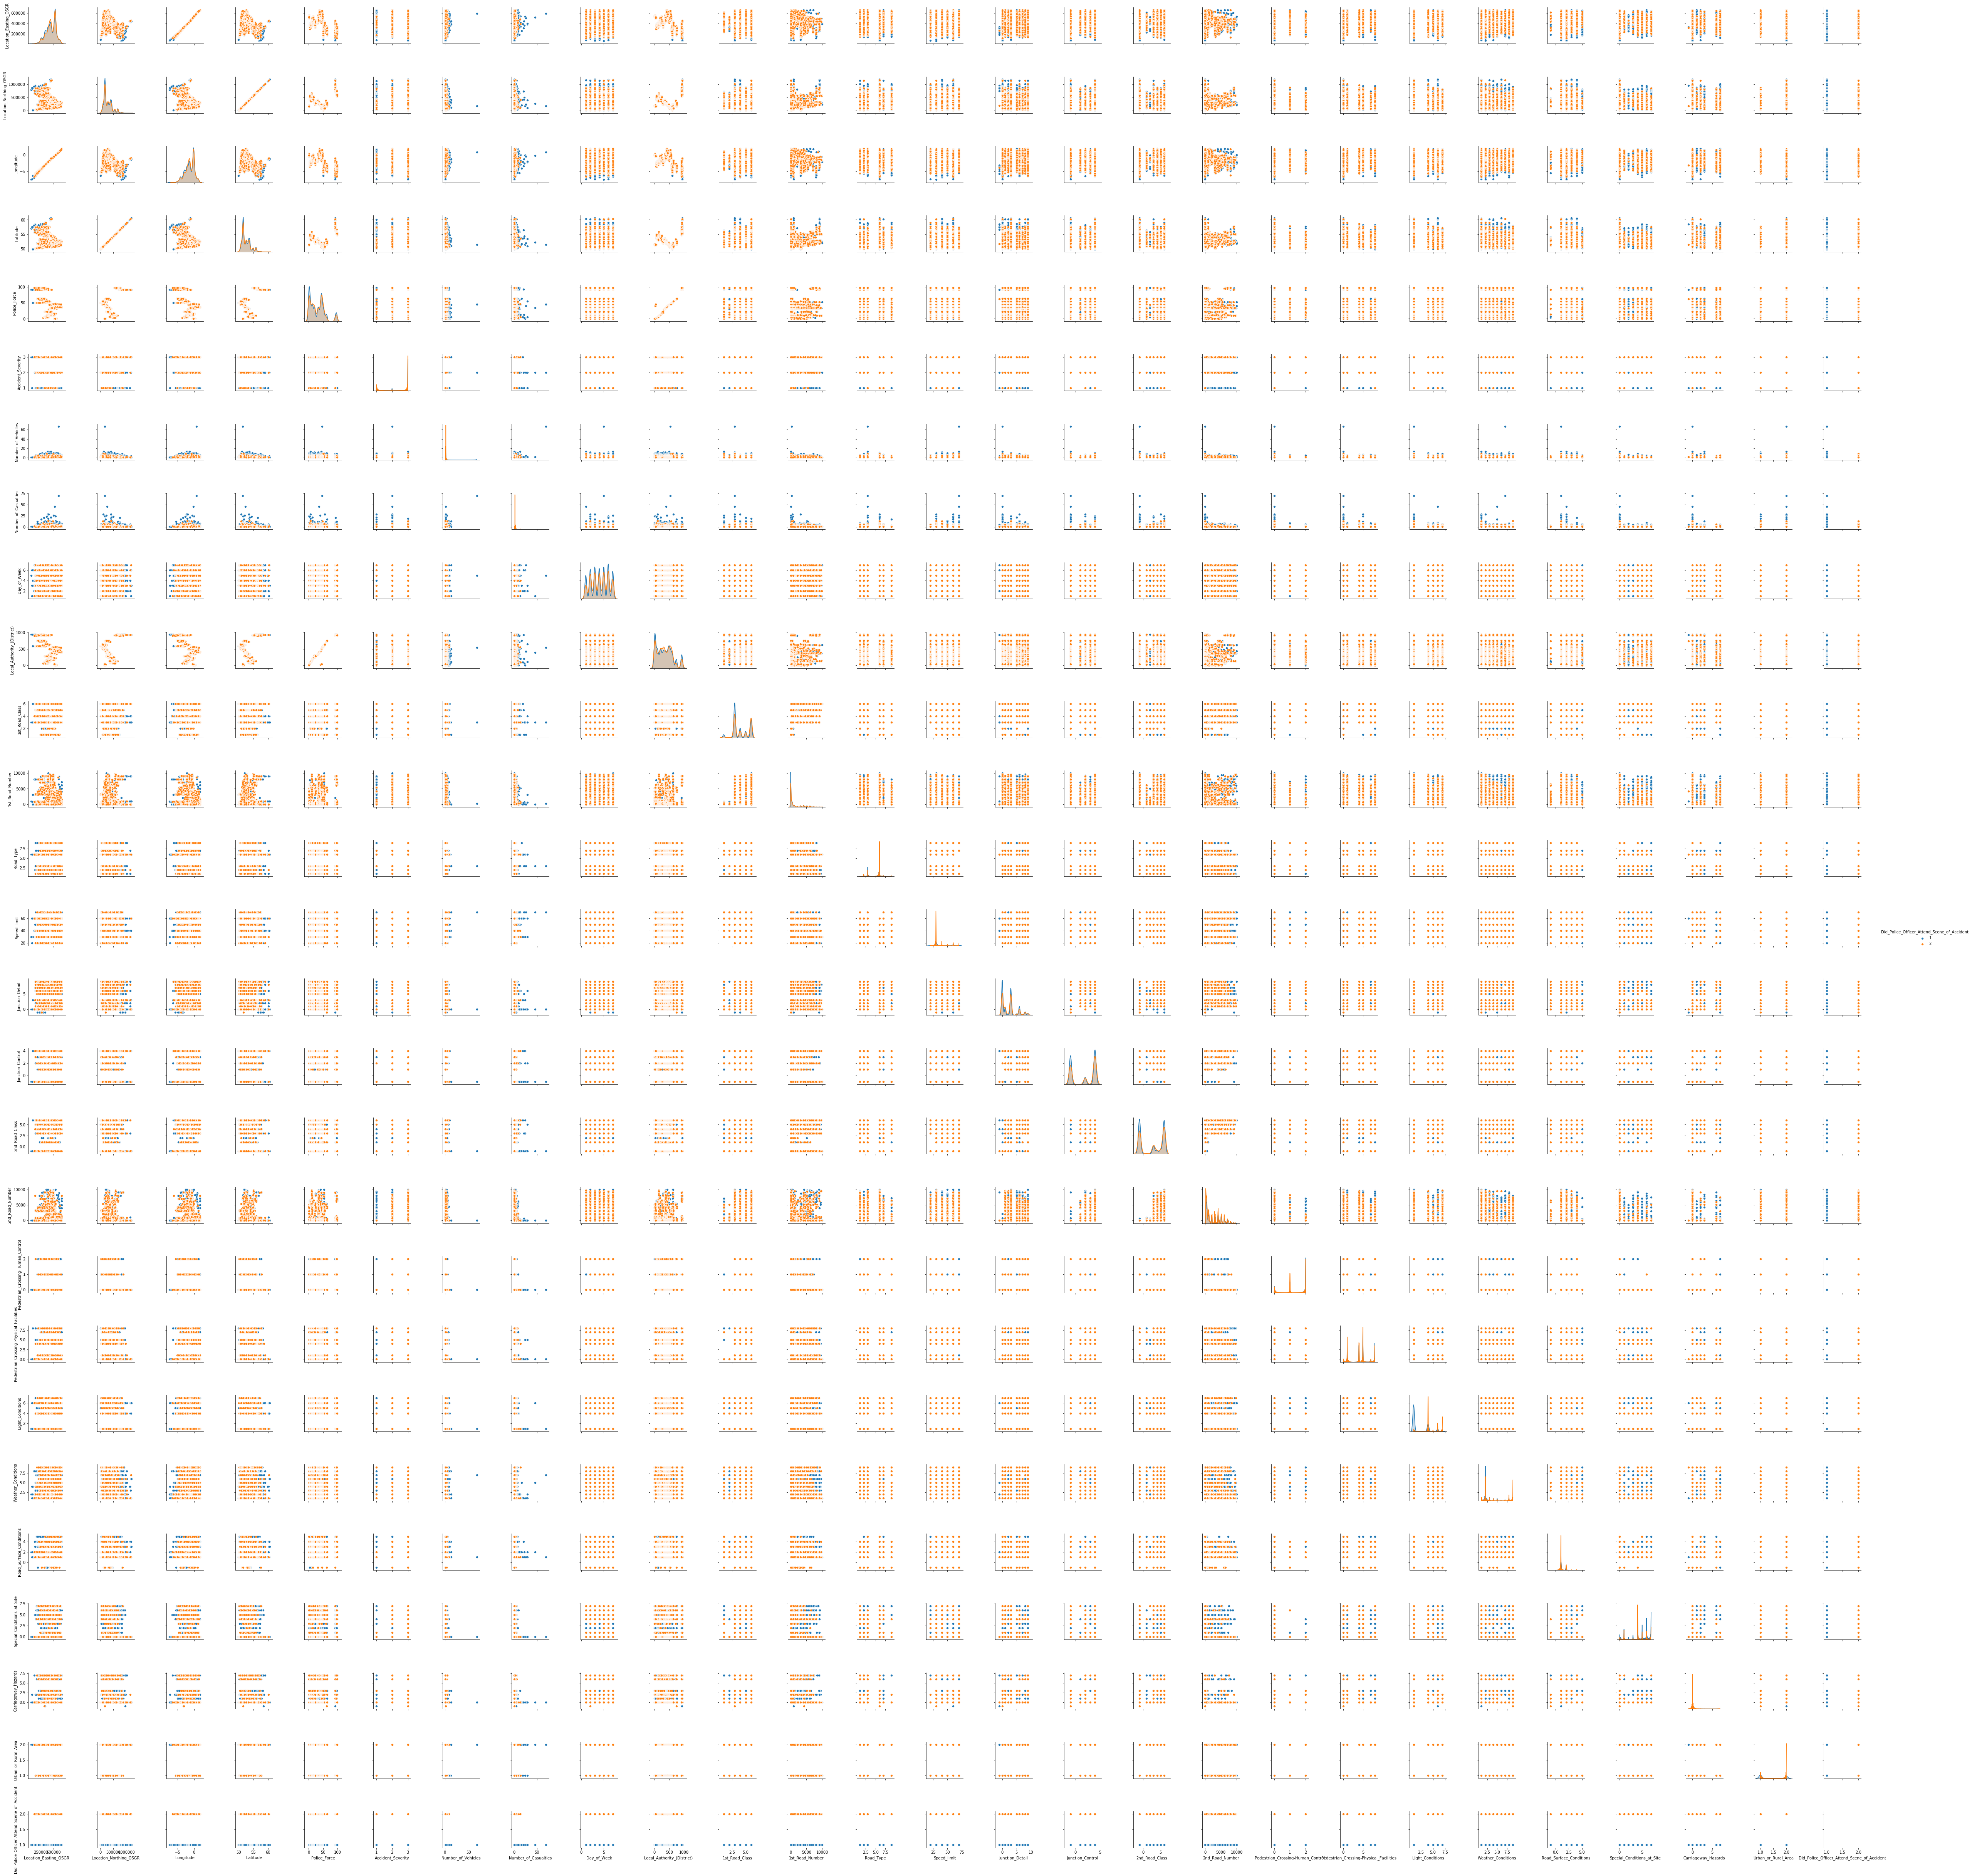

In [0]:
sns.pairplot(df, hue="Did_Police_Officer_Attend_Scene_of_Accident")

Maybe let's draw the pair plots for fewer variables. From the below chart it seems that juction details and light conditions could be two determining factor that could help us to predict the police attendance, e.g. if we build a tree-based classifier they might provide the algorithm with some information gain.  

C:\Users\Alireza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Alireza\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\Alireza\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\Alireza\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Alireza\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Alireza\Anaconda3\lib\site-package

<function matplotlib.pyplot.show(*args, **kw)>

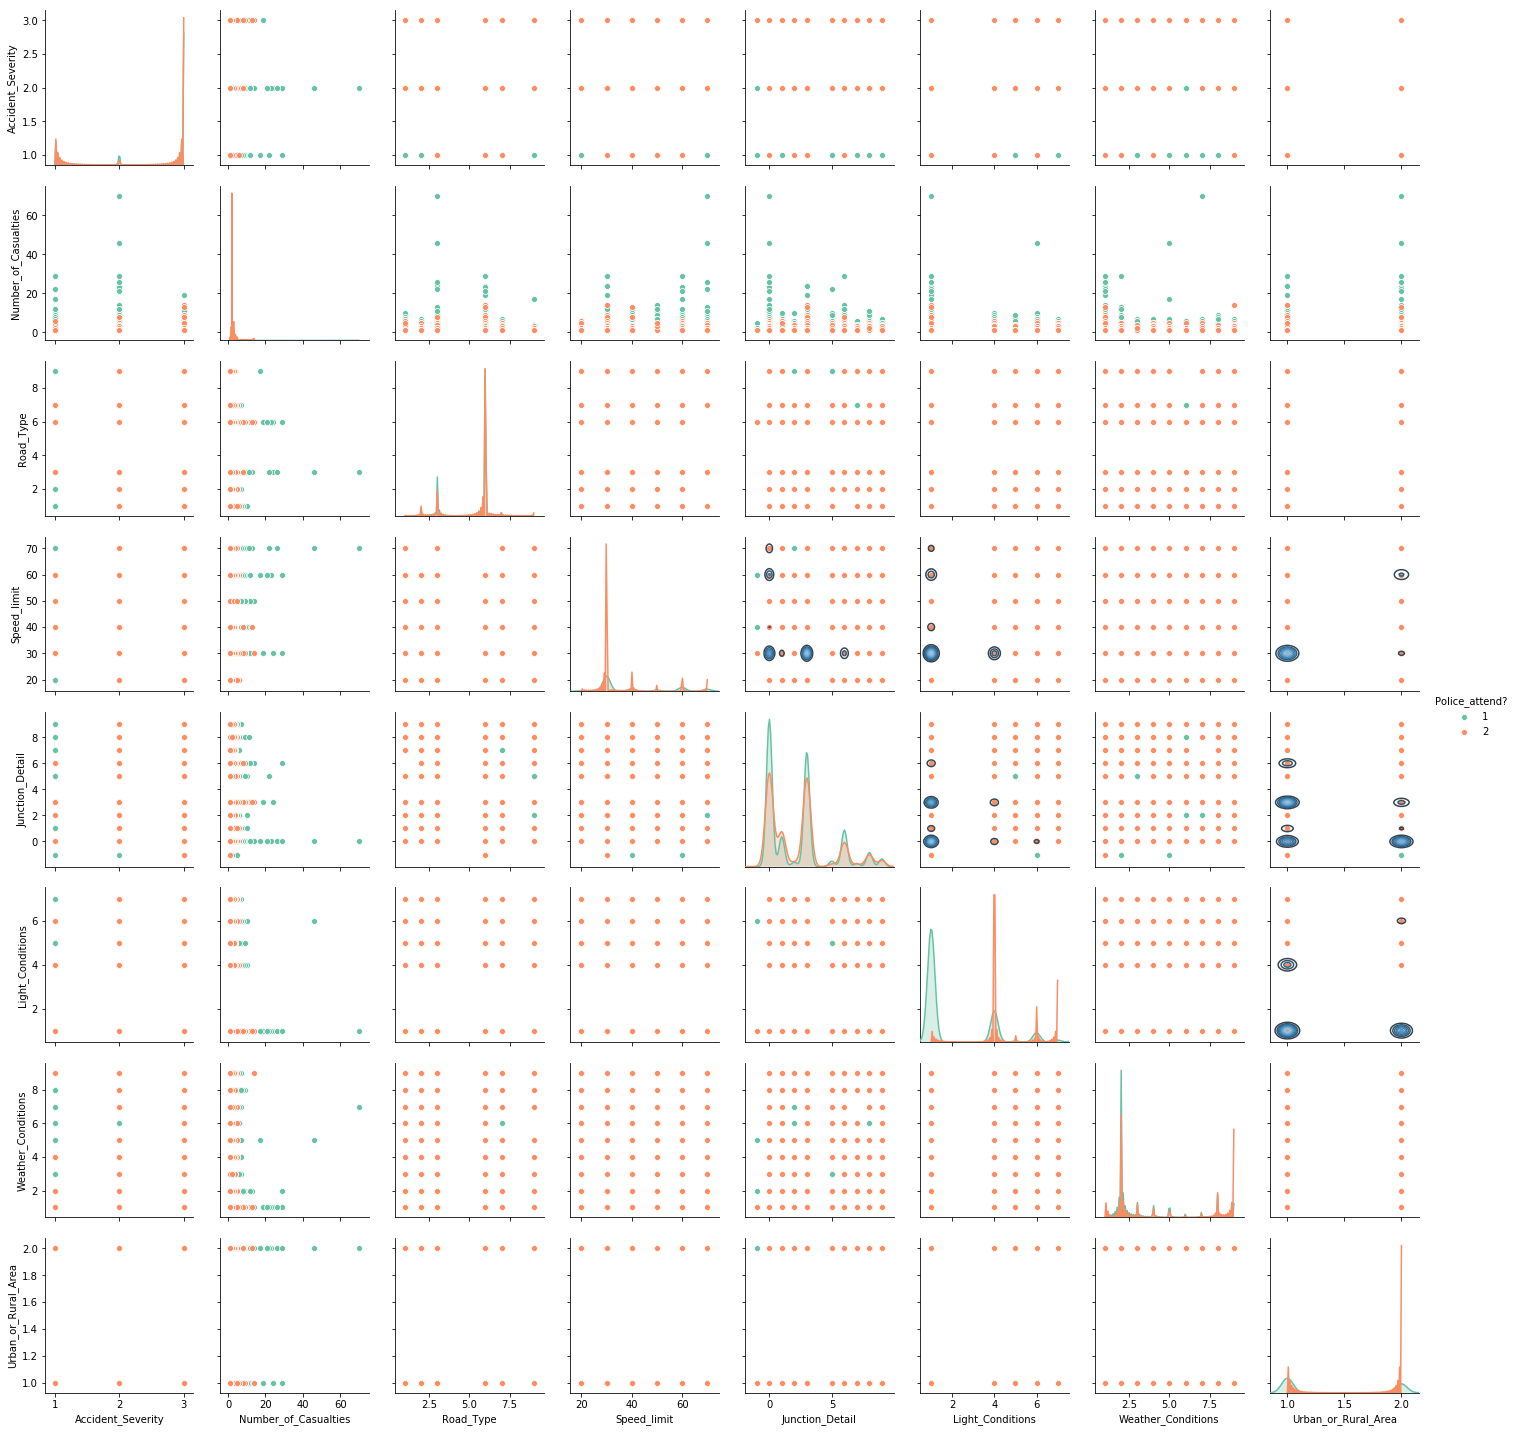

In [0]:
sns.pairplot(df, vars=['Accident_Severity','Number_of_Casualties','Road_Type','Speed_limit','Junction_Detail','Light_Conditions','Weather_Conditions','Urban_or_Rural_Area'],hue="Police_attend?",palette="Set2", diag_kind="kde").map_upper(sns.kdeplot, cmap="Blues_d")
plt.show

The below figures shows a joint plot between accident severity and speed limit. However it seems that this specific visualision is not very helpful as most features are kind of categorical rather than a real random numerical variable. 

C:\Users\Alireza\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Alireza\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


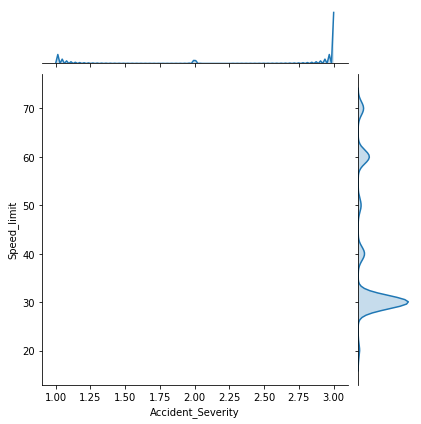

In [0]:
joint ('Accident_Severity','Speed_limit')

Let's do some cosmetic changes and change the name of the column Did_Police_Officer_Attend_Scene_of_Accident to Police_attend?

In [0]:
df=df.rename(columns={"Did_Police_Officer_Attend_Scene_of_Accident": "Police_attend?" })

Lets compare the distribution for various features next to next for police attend=1 and 2. 

The below distribution shows that the frequency of value 1 and 2 is the highest when the speed limit is 30. This specific frequency is higher for police_attend=2. 

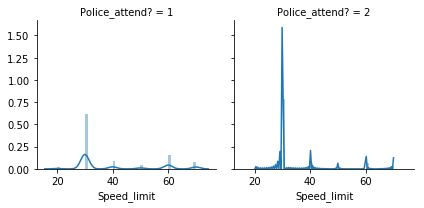

In [0]:
dist_plot('Police_attend?','Speed_limit')

The below distributions demonstrate that again we have very similar distribution for police attend = 1 and 2 in terms of accident severity. for both, we have the highest pick for accident severity=3.  

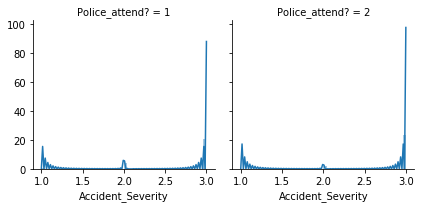

In [0]:
dist_plot('Police_attend?','Accident_Severity')

Now let's move to count plot and see if we can understand some difference between police attendence. 

The first count plot shows that police attendence 1 and 2 is the highest for 30. It seems that 60 stands at the second place for both too. 

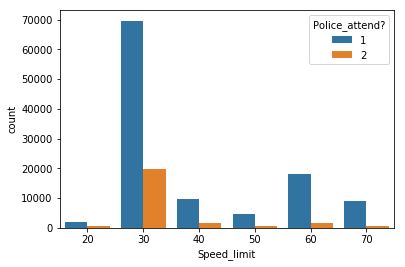

In [0]:
count_plot('Speed_limit',hue='Police_attend?')

Again we have the highest count for both police attend=1 and 2 for weather condition =1. Both classes follow the same trend when compared for various weather condition categories. 

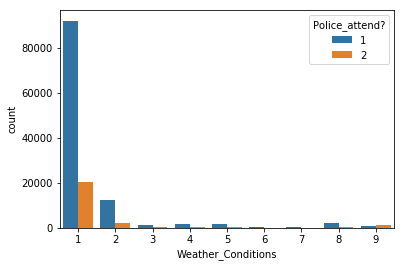

In [0]:
count_plot('Weather_Conditions',hue='Police_attend?')

The below visuals also confrim that there is a lot of overlapping for police attend=1 and 2. 

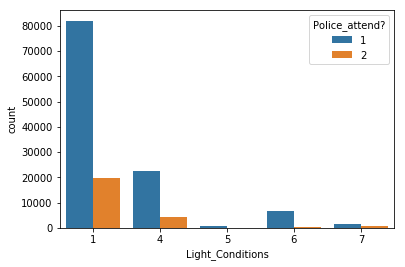

In [0]:
count_plot('Light_Conditions',hue='Police_attend?')

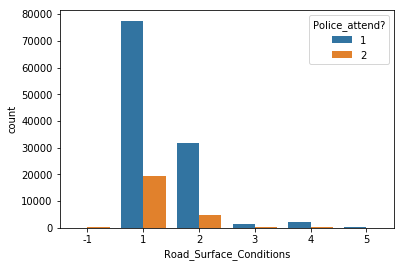

In [0]:
count_plot('Road_Surface_Conditions','Police_attend?')

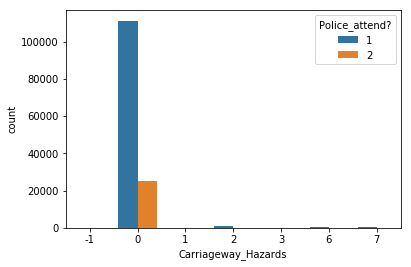

In [0]:
count_plot('Carriageway_Hazards','Police_attend?')

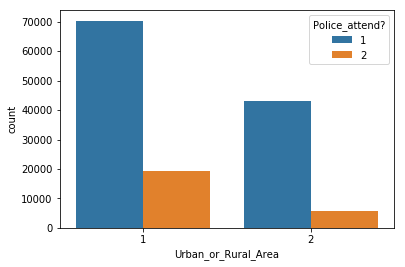

In [0]:
count_plot('Urban_or_Rural_Area','Police_attend?')

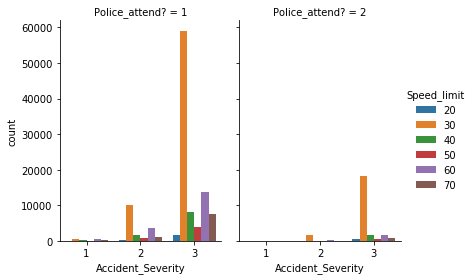

In [0]:
cat_plot('Accident_Severity','Speed_limit','Police_attend?',4,0.7)

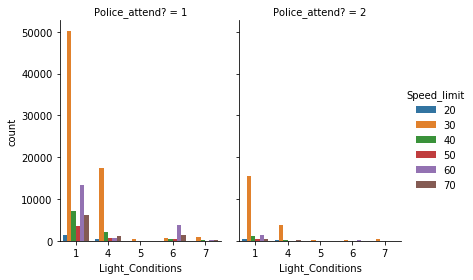

In [0]:
cat_plot('Light_Conditions','Speed_limit','Police_attend?',4,0.7)

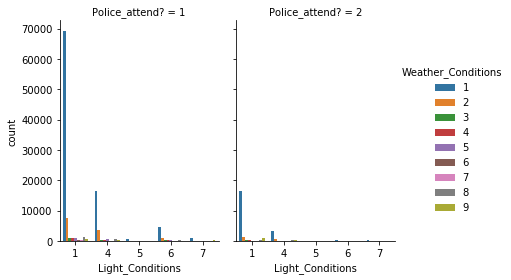

In [0]:
cat_plot('Light_Conditions','Weather_Conditions','Police_attend?',4,0.7)

The figure below shows the correlation matrix. AS is evident, there is high correlation between Location_Easting_OSGR and Longtitude; and Location_Northing_OSGR with Latitude. This was expected. There is another strong positive correlation between Police_Force and Local_Authority(District). Unfortunately we don't know what each features refer to so we cannot judge. However what we can say from the columns headers is that this correlation is by chance as Local_Authority(District) should be categorical feature, i.e. a number is assign to each district which does not reprsent any higher or lower.

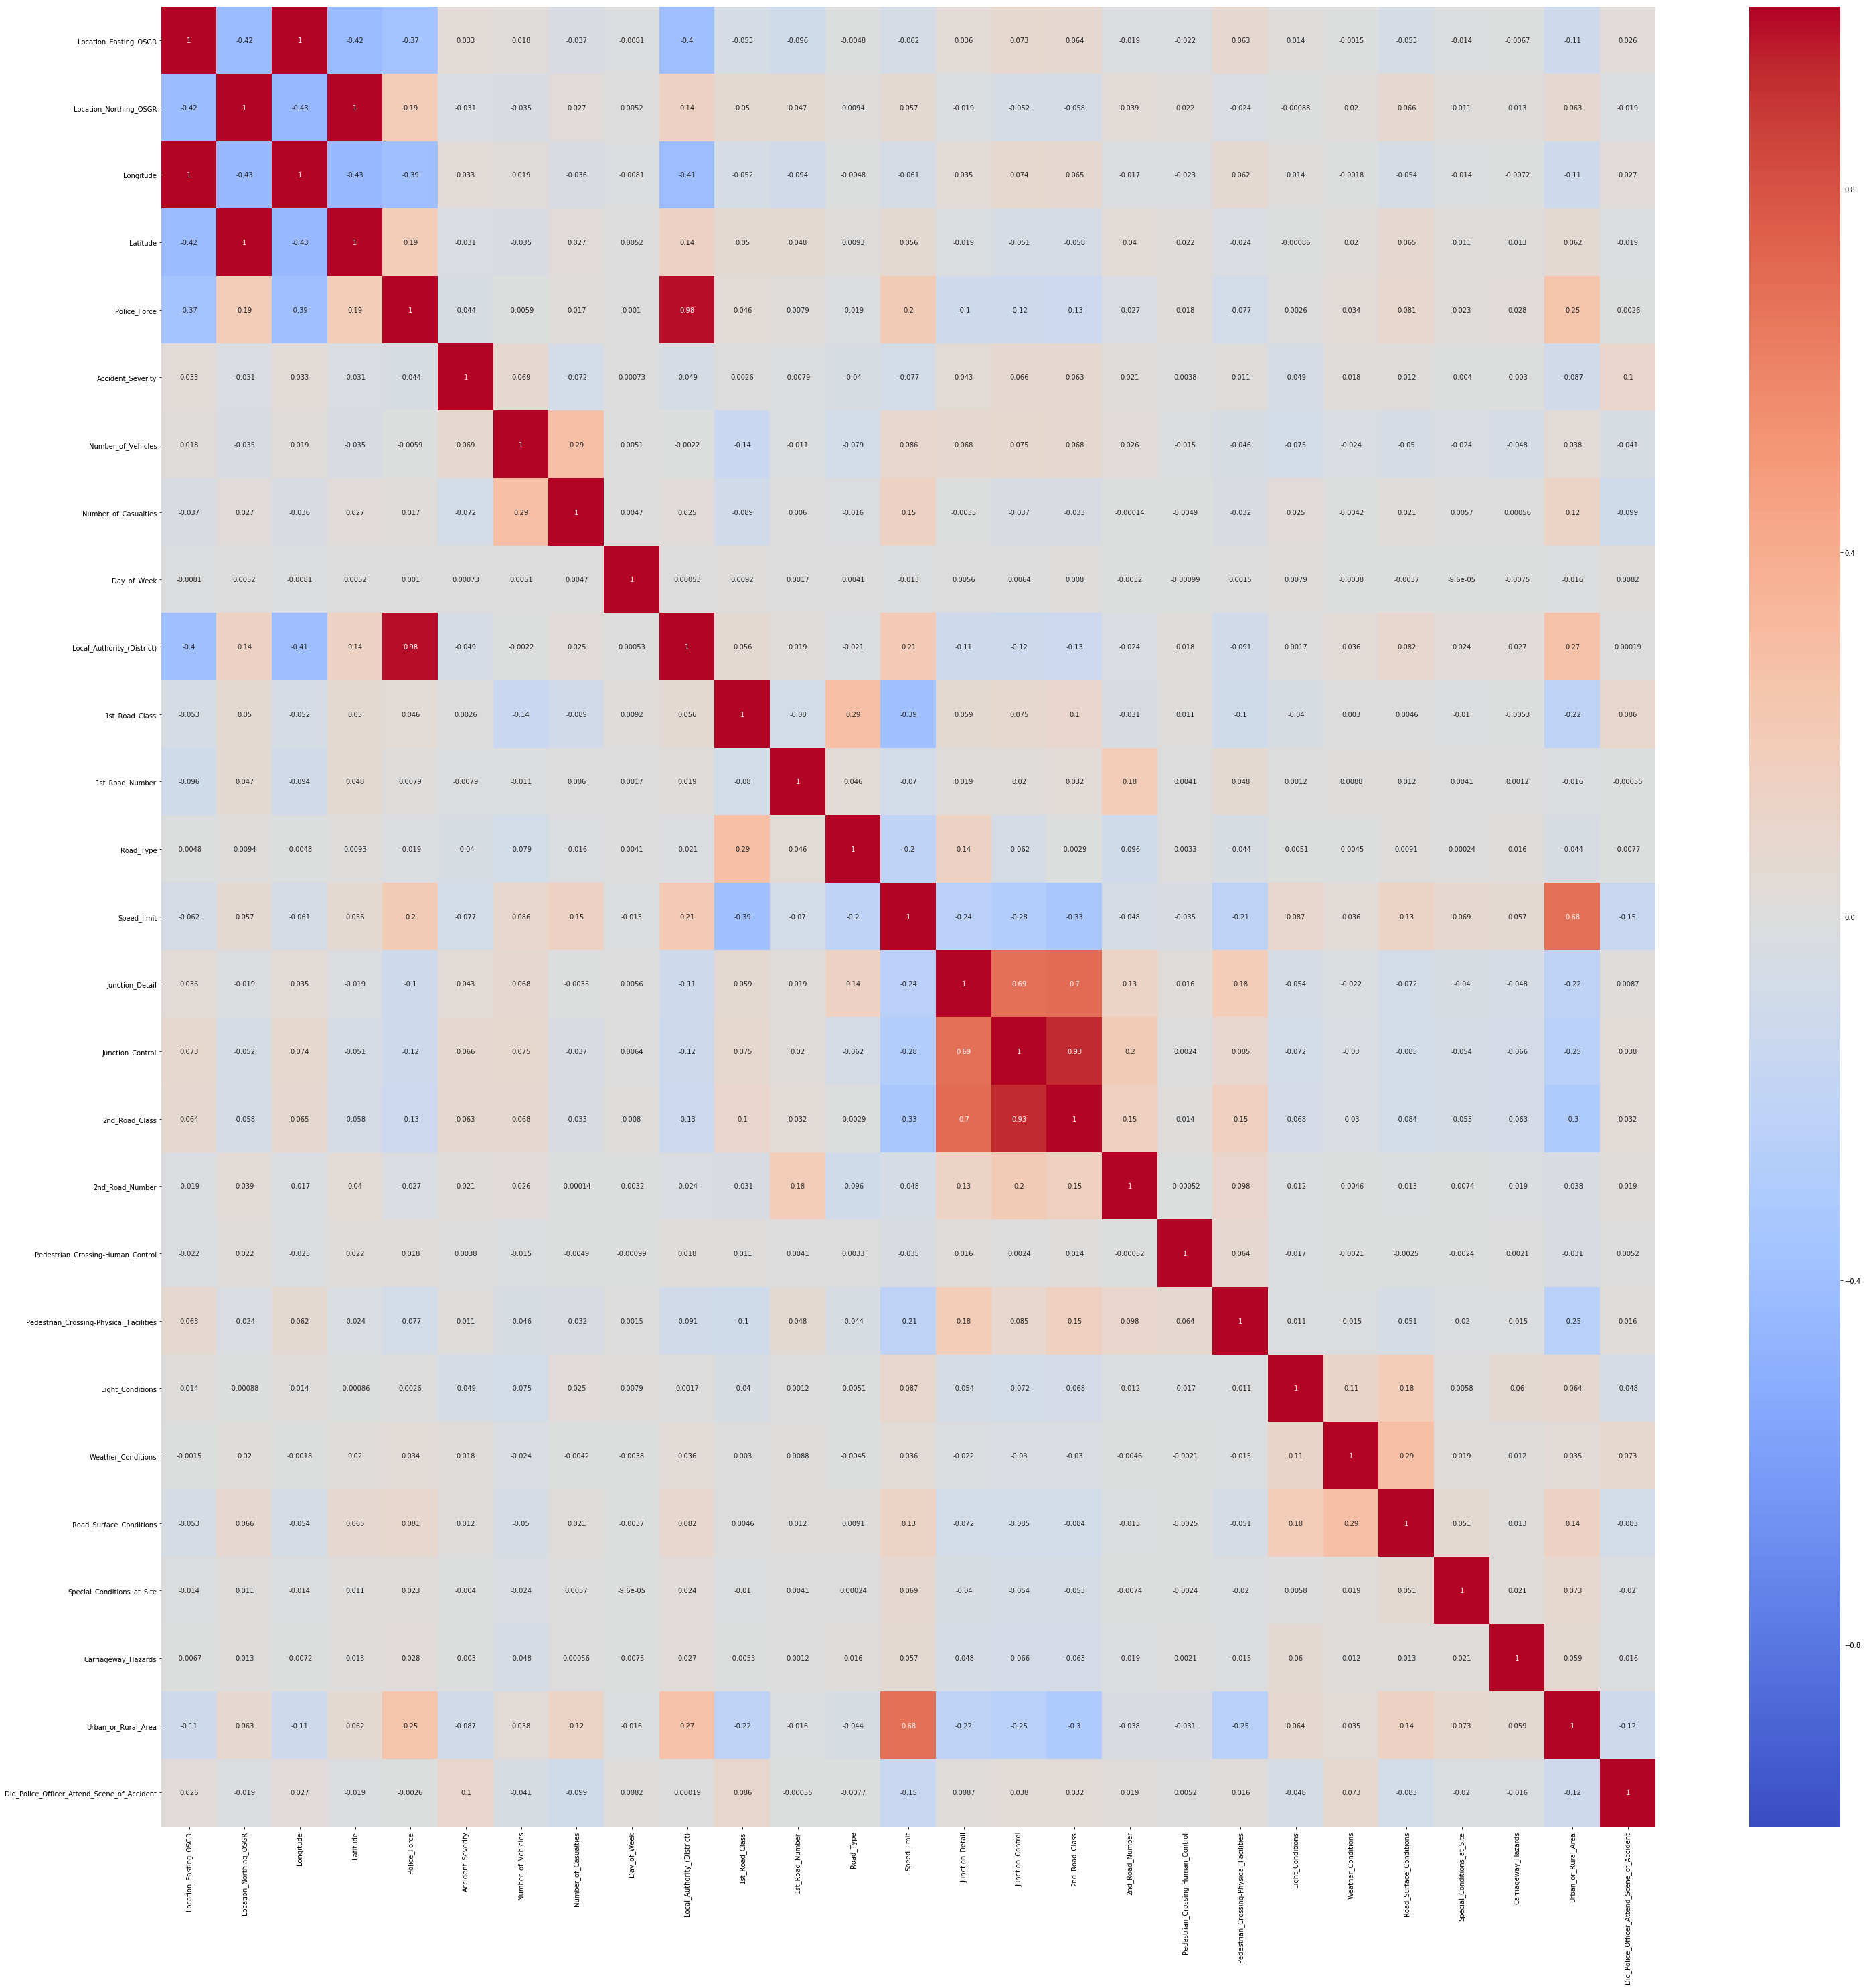

In [0]:
correlation(df,50,50, 'coolwarm')

# 5. Geospatial Analysis

In [0]:
df = df[df['Police_attend?'] != -1]

For geo-analysis we first need to create a geometry using the longitudes. and latitudes. we do that using Point method available in shapely library. 

In [0]:
geometry=[Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]

Now we need to create a geo datafra,e using GeoPandas library. 

In [0]:
geo_df=gpd.GeoDataFrame(df,geometry=geometry)
geo_df.head().transpose()

0  \
Accident_Index                                             201301BS70003   
Location_Easting_OSGR                                             527060   
Location_Northing_OSGR                                            177970   
Longitude                                                      -0.171402   
Latitude                                                         51.4864   
Police_Force                                                           1   
Accident_Severity                                                      2   
Number_of_Vehicles                                                     2   
Number_of_Casualties                                                   1   
Date                                                 2013-01-02 00:00:00   
Day_of_Week                                                            4   
Time                                                               09:08   
Local_Authority_(District)                                            12   
Local_Authority_(Highway)                                      E09000020   
1st_Road_Class                                                         3   
1st_Road_Number                                                     3217   
Road_Type                                                              6   
Speed_limit                                                           30   
Junction_Detail                                                        3   
Junction_Control                                                       4   
2nd_Road_Class                                                         6   
2nd_Road_Number                                                        0   
Pedestrian_Crossing-Human_Control                                      0   
Pedestrian_Crossing-Physical_Facilities                                0   
Light_Conditions                                                       1   
Weather_Conditions                                                     1   
Road_Surface_Conditions                                                1   
Special_Conditions_at_Site                                             0   
Carriageway_Hazards                                                    0   
Urban_or_Rural_Area                                                    1   
Did_Police_Officer_Attend_Scene_of_Accident                            1   
LSOA_of_Accident_Location                                      E01002844   
Datetime                                             2013-01-02 09:08:00   
geometry                                     POINT (-0.171402 51.486361)   

                                                                               1  \
Accident_Index                                                     201301BS70005   
Location_Easting_OSGR                                                     526900   
Location_Northing_OSGR                                                    178940   
Longitude                                                              -0.173356   
Latitude                                                                 51.4951   
Police_Force                                                                   1   
Accident_Severity                                                              3   
Number_of_Vehicles                                                             1   
Number_of_Casualties                                                           2   
Date                                                         2013-01-04 00:00:00   
Day_of_Week                                                                    6   
Time                                                                       08:16   
Local_Authority_(District)                                                    12   
Local_Authority_(Highway)                                              E09000020   
1st_Road_Class                                                                 3   
1st_Road_Number                                                   

Now we can investigate where we have value 1 or 2 for the column 'Did_Police_Officer_Attend_Scene_of_Accident' using the geo_plot function defined in the helper function section.

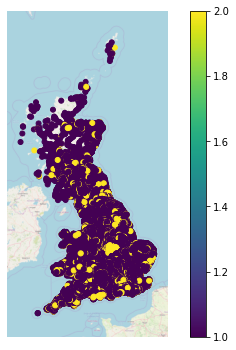

In [0]:
geo_plot('Did_Police_Officer_Attend_Scene_of_Accident')

Since two many points overlap each other it is not so clear where we have value 1 (purple) or value 2 (yellow) across the UK. So let's visualise that in another way:

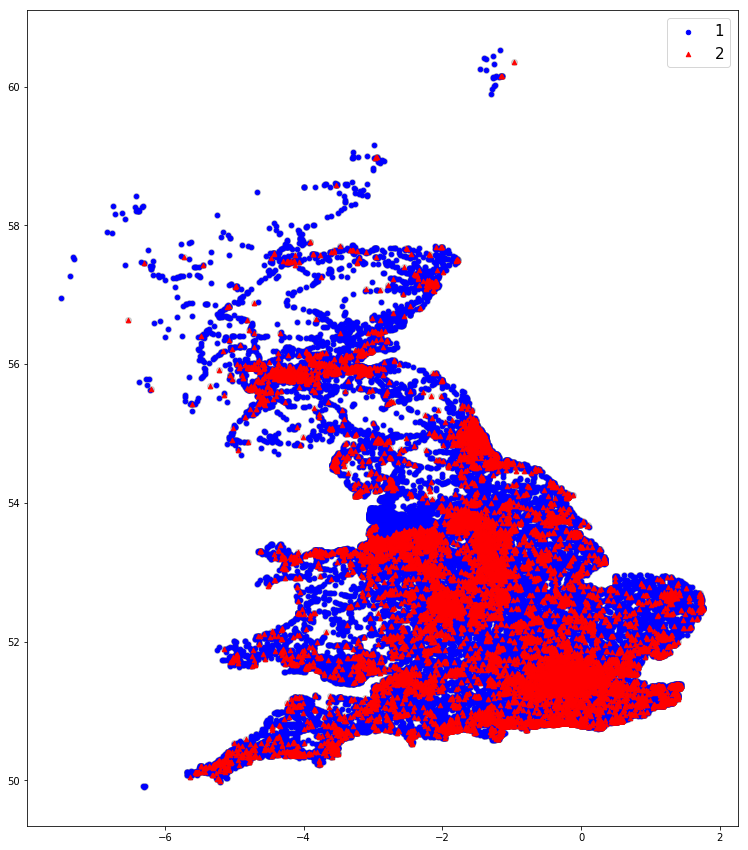

In [0]:
fig,ax=plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax,alpha=0.3,color='grey')
geo_df[geo_df['Did_Police_Officer_Attend_Scene_of_Accident']==1].plot(ax=ax, markersize=20, 
                                                                      color='blue',marker="o",
                                                                     label="1")
geo_df[geo_df['Did_Police_Officer_Attend_Scene_of_Accident']==2].plot(ax=ax, markersize=20, 
                                                                      color='red',marker="^",
                                                                     label="2")
plt.legend(prop={'size':15})

As can be seen from the above geo_plot, most cases 2 are located in the south while cases 1 are distributed across whole UK

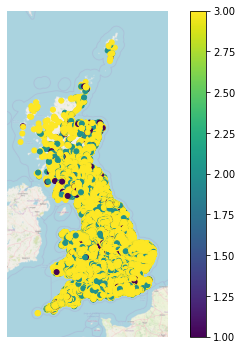

In [0]:
geo_plot('Accident_Severity')

From the above and below figure which relates to accident severity we can only say that accident severity=3 is distributed across the UK and not accumolated in only one part of the country. 

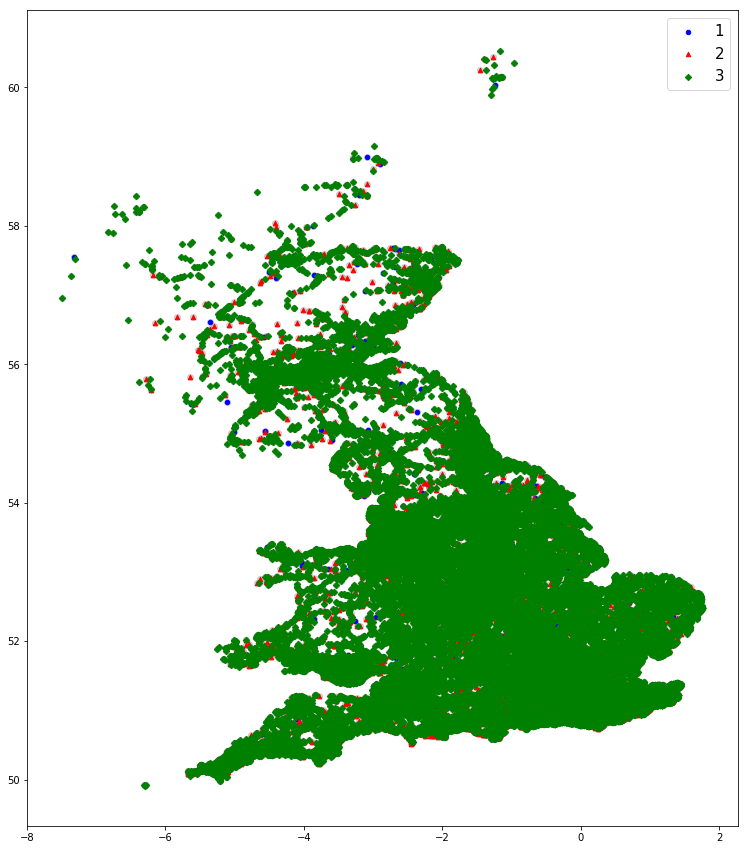

In [0]:
fig,ax=plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax,alpha=0.3,color='grey')
geo_df[geo_df['Accident_Severity']==1].plot(ax=ax, markersize=20, color='blue',marker="o",label="1")
geo_df[geo_df['Accident_Severity']==2].plot(ax=ax, markersize=20, color='red',marker="^",label="2")
geo_df[geo_df['Accident_Severity']==3].plot(ax=ax, markersize=20, color='green',marker="D",label="3")

plt.legend(prop={'size':15})

The figure below shows that the south part of the UK where we had the most cases=2 for if the police attended the scene has low speed limit around 30 and 40. 

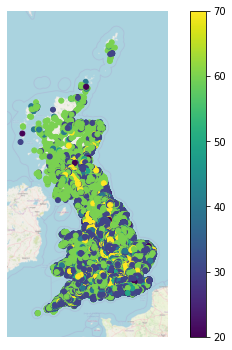

In [0]:
geo_plot('Speed_limit')

# 6. Machine Learning

Now let's build some machine learning algorithms to predict wether the police attend the scene of accident. But before that let's investigate if we have a balance data set. 

In [0]:
count('Did_Police_Officer_Attend_Scene_of_Accident')

 1    113358
 2     25301
-1         1
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

We have 113358 cases for value 1, 25301 for value 2. and 1 for value -1. So our dataset is imbalance which is one of the major and usual problem in classification tasks. Lets first remove the row that has value of -1 for this target column. 

In [0]:
df = df[df['Police_attend?'] != -1]

Let's create another dataframe specifically for ML algorithm. For this purpose, we drop some columns:

1-Accident Index which seems to be only a unique indexing column.

2- Location_Easting and Northing which are similar to Longitude and Latitude.

3- Date and Time although they might have some predictive power however we first try to see if we can build a reasonable algorithm without those and in case the algorithm did not perform well we well add them.

4- LSOA_of_Accident_Location which has many nulls

In [0]:
df_ML=df.drop(columns=['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Date','Time','LSOA_of_Accident_Location','Datetime'])

Now we need to find the dummies for column Local_Authority_(Highway) which is our only categorical feature remaining:


In [0]:
df_ML=pd.get_dummies(data=df_ML, columns=['Local_Authority_(Highway)'])

Now we need to change the value of teh label column from numeric to boolean:

In [0]:
dic = {1: '0', 2: '1'}
df_ML.replace({"Police_attend?": dic},inplace=True)

In [0]:
dic2={'0':0,'1':1}
df_ML.replace({"Police_attend?": dic2},inplace=True)

Here we use Random Forest to perform the classification task. Random forest is an ensamble method that combines weaker models (Decision Tree) for better prediction. Random Forest has several advantages such as:

1. It can avoid overfitting problem.
2. It can deal with bias-variance trade-off.
3. It is fast and can deal with both numerical and categorical features.
4. It supporst methods such as (bagging to reduce the variance; boosting to decrease the bias; stacking to enhance the performance).  

We first build a simple random forest just for the sake of time and will develop into more advanced methods such as AdaBoost, GradientBoosting etc. 

Before we balance the dataset lets see how our algorithm will perform for an imbalance data set. This would be helpful because if we generate some data points artificially, they won't represent a real distribution. 

In [0]:
labels=df_ML['Police_attend?']# defining teh label column

#train-test split
data_train, data_test, label_train, label_test = train_test_split(df_ML, labels, test_size=0.4, random_state=7)

#droping the label from train and test sets.
data_train=data_train.drop(labels=['Police_attend?'],axis=1)
data_test=data_test.drop(labels=['Police_attend?'],axis=1)

#defining the model
Model_RFC=RandomForestClassifier(n_estimators=10,oob_score=True)

#fitting the model
Model_RFC.fit(data_train,label_train)

#Calculating the feature importance
Model_RFC.feature_importances_

C:\Users\Alireza\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Alireza\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


array([1.34263945e-01, 1.34439658e-01, 3.04255179e-02, 1.30693961e-02,
       3.09560662e-02, 1.72959160e-02, 7.60697293e-02, 5.92287279e-02,
       2.71999532e-02, 7.56790391e-02, 2.00603069e-02, 2.64837044e-02,
       2.84854298e-02, 1.33235272e-02, 1.60095751e-02, 2.84986489e-02,
       1.67618467e-03, 2.34637555e-02, 2.61100895e-02, 3.39094584e-02,
       2.02609297e-02, 4.41009057e-03, 3.36321499e-03, 1.35009603e-02,
       2.82480200e-04, 5.24383343e-04, 4.48755786e-04, 6.82887419e-04,
       5.53752890e-04, 4.40737202e-04, 9.83027769e-04, 2.30663188e-04,
       2.76739350e-04, 1.24198691e-03, 1.30229470e-03, 1.12940967e-03,
       7.45228888e-04, 5.48885516e-04, 1.11530779e-03, 1.31228155e-03,
       1.11587665e-04, 1.17707092e-03, 8.13207861e-04, 6.15810823e-04,
       9.34435168e-04, 6.38061305e-04, 1.25857675e-03, 8.52612395e-04,
       1.00277235e-03, 4.00257414e-04, 4.11615567e-04, 7.86893550e-04,
       6.31923555e-04, 5.86703931e-04, 9.14723677e-04, 7.21937909e-04,
      

Figure below shows the 10 most important features. Longtitude, latitude and day of week are the first 3 which makes sense. It was also evident from geospatial analysis that cases 2 were mostly located in the southern UK. 

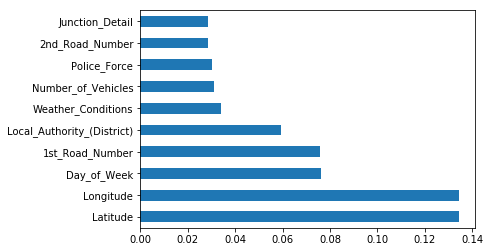

In [0]:
pd.Series(Model_RFC.feature_importances_, index=data_train.columns).nlargest(10).plot(kind='barh')

Now we visualise the confusion matrix to get an understanding of TP, FP, TN, and FN. According to the confusion matrix, our algorithm did not perform well in classifying the case 2s. It was expected because we did have an imbalance dataset and cases 2 were the minor class. 

In [0]:
predictions=Model_RFC.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

Text(0.5, 1.0, 'Confusion Matrix')

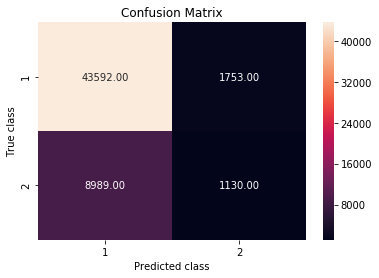

In [0]:
sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['1','2'] , 
            yticklabels = ['1','2'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

Here we compare other metrics. As is evident, all metrics are very low for class 1 (cases 2) or the minor class. 

the metrics we have are:

1. Precision= TP/(TP+FP)
2. Recall (True Positive Rate, Sensivity)= TP/(TP+FN)
3. F!= 2*(Precision*Recall)/(Precision+Recall)

In [0]:
print(classification_report(label_test, Model_RFC.predict(data_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     45345
           1       0.39      0.11      0.17     10119

   micro avg       0.81      0.81      0.81     55464
   macro avg       0.61      0.54      0.53     55464
weighted avg       0.75      0.81      0.76     55464



Here is the accuracy of the model although this is not an useful metric here because of imbalance data set.

In [0]:
accuracy_score(label_test, predictions)

0.8063248233088129

Figure shows the ROC curve with an AUC=0.54 which is hardly better than random guessing!

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

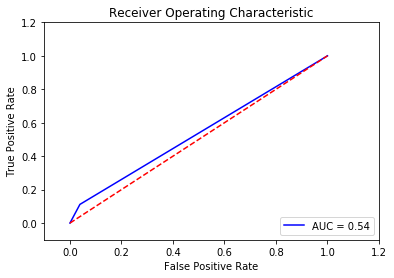

In [0]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 7. Upsampling

One of the easy and fast methods (among many others including SMOTE or clustering-based upsampling) to balance the data set is upsampling through artificially generating data points for the minor class. Here we use this method to balance the data set and make the examples for the minor class equal to major class. 

Please note that we drop Local_Authority_(Highway) here as well which was the only categorical feature that we had since it had not that much predictive power based on our feature importance calculated previously. This will saveus a lot of troubles!

In [0]:
df_up=df.drop(columns=['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Date','Time','LSOA_of_Accident_Location','Datetime','Local_Authority_(Highway)'])

In [0]:
dic = {1: '0', 2: '1'}
df_up.replace({"Police_attend?": dic},inplace=True)

In [0]:
dic2={'0':0,'1':1}
df_up.replace({"Police_attend?": dic2},inplace=True)

In [24]:
df_majority = df_up[df_up['Police_attend?']==0]  #filtering for majority class
df_minority = df_up[df_up['Police_attend?']==1]  #filtering for minority class

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=113358,    # to match majority class
                                 random_state=123)

#creating the balanced data set.
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled['Police_attend?'].value_counts()

1    113358
0    113358
Name: Police_attend?, dtype: int64

In [0]:
labels=df_upsampled['Police_attend?']
data_train, data_test, label_train, label_test = train_test_split(df_upsampled, labels, test_size=0.4, random_state=7)
data_train=data_train.drop(labels=['Police_attend?'],axis=1)
data_test=data_test.drop(labels=['Police_attend?'],axis=1)

In [26]:
rfc_up=RandomForestClassifier(n_estimators=10,oob_score=True)
rfc_up.fit(data_train,label_train)
rfc_up.feature_importances_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide



array([0.14730498, 0.14910625, 0.05180523, 0.0207281 , 0.03710939,
       0.02390588, 0.07183125, 0.09930062, 0.02878312, 0.08849517,
       0.02131843, 0.04077086, 0.03112708, 0.01254781, 0.0188999 ,
       0.03297352, 0.00174486, 0.0235884 , 0.02348908, 0.03077917,
       0.01900818, 0.00506001, 0.00397129, 0.01635141])

Feature importance after upsampling method shows some changes e.g. we have Local_Authory_(District) at the third place. 

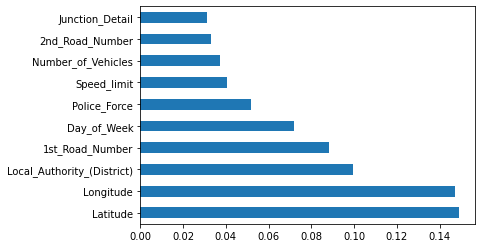

In [27]:
pd.Series(rfc_up.feature_importances_, index=data_train.columns).nlargest(10).plot(kind='barh')

Now we investigate how our algorithm performed after upsampling using confusion matrix. As can be seen, the algorithm is much more successful than before after upsampling in classifying the cases 2. 

In [0]:
predictions=rfc_up.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

Text(0.5, 1.0, 'Confusion Matrix')

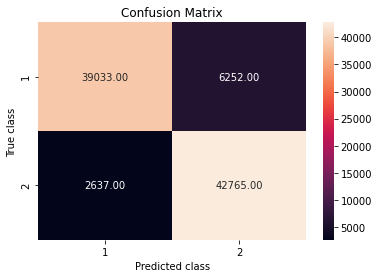

In [29]:
sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['1','2'] , 
            yticklabels = ['1','2'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

Here is other metrics that are all improved. 

In [30]:
print(classification_report(label_test, rfc_up.predict(data_test)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     45285
           1       0.87      0.94      0.91     45402

    accuracy                           0.90     90687
   macro avg       0.90      0.90      0.90     90687
weighted avg       0.90      0.90      0.90     90687



In [31]:
accuracy_score(label_test, predictions)

0.9019815409044295

Last check: ROC curve is far away from random guessing with an AUC=0.90.

In [0]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

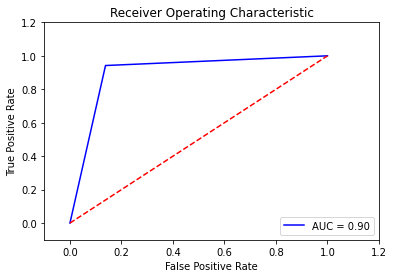

In [33]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 8. Grid search

Here we check if we can improve our algorithm even more by tunning some hyper parameters. This is also helpful to avoid overfitting. We first check the current hyperparameters and then we define a range of parameters and then we run random grid search to find the optimum values. 

In [0]:
print('Parameters currently in use:\n')
print(rfc_up.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [0]:
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 20, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train,label_train)

rf_random.best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 111.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 174.7min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

Now that we tunned our hyperparameters we can use those optimal parameters and investigate if it will improve the performance of our algorithm. 

Text(0.5, 1.0, 'Confusion Matrix')

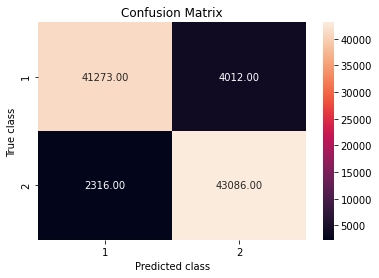

In [58]:
labels=df_upsampled['Police_attend?']
data_train, data_test, label_train, label_test = train_test_split(df_upsampled, labels, test_size=0.4, random_state=7)
data_train=data_train.drop(labels=['Police_attend?'],axis=1)
data_test=data_test.drop(labels=['Police_attend?'],axis=1)
rfc_ht=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features= 'auto',
                                 max_depth= None,
                                 bootstrap= False)

rfc_ht.fit(data_train,label_train)

predictions=rfc_ht.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['1','2'] , 
            yticklabels = ['1','2'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [35]:
print(classification_report(label_test, rfc_ht.predict(data_test)))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     45285
           1       0.91      0.95      0.93     45402

    accuracy                           0.93     90687
   macro avg       0.93      0.93      0.93     90687
weighted avg       0.93      0.93      0.93     90687



In [36]:
accuracy_score(label_test, predictions)

0.9294606724227287

As can be seen, our all metrics have improved. In addition our AUC is also improved to 0.93. 

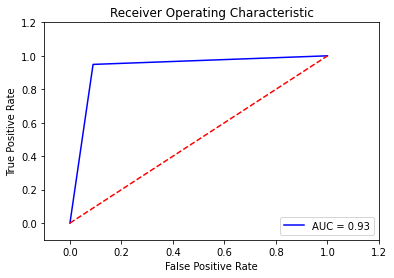

In [37]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 9. Prediction using top 10 features

It is always one the goals of any machine learning development to predict the target with fewer number of variables/predictors. This is because if the model deals with many predictor variables, then there is a high chance that there are hidden relationships between some of them leading to redundancy and even if there is no relationship between any of them, the model can suffer from overfitting when there are a large number of predictor variables. In addition, a model that can predict with fewer number of predictor variables is more practical due to some consideration such as data availability, storage, computer resources, time taken for computation, etc. Here our goal to use the same tunned model but just train it on a data set that only includes the top 10 features. 

In [0]:
#Filtering for the top 10 features. 
df_10=df_upsampled[['Latitude','Longitude','Local_Authority_(District)','1st_Road_Number','Day_of_Week','Police_Force','Speed_limit','Number_of_Vehicles',
                    '2nd_Road_Number','Junction_Detail','Police_attend?']]

Text(0.5, 1.0, 'Confusion Matrix')

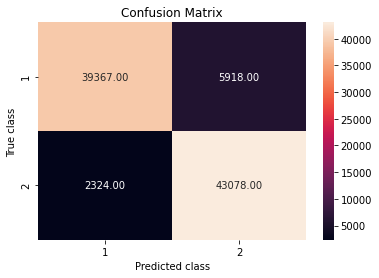

In [41]:
labels=df_10['Police_attend?']
data_train, data_test, label_train, label_test = train_test_split(df_10, labels, test_size=0.4, random_state=7)
data_train=data_train.drop(labels=['Police_attend?'],axis=1)
data_test=data_test.drop(labels=['Police_attend?'],axis=1)
rfc_ht=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features= 'auto',
                                 max_depth= None,
                                 bootstrap= False)

rfc_ht.fit(data_train,label_train)

predictions=rfc_ht.predict(data_test)
confusion=metrics.confusion_matrix(label_test, predictions)

sns.heatmap(confusion, annot=True, fmt='.2f',xticklabels = ['1','2'] , 
            yticklabels = ['1','2'] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')

In [42]:
print(classification_report(label_test, rfc_ht.predict(data_test)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     45285
           1       0.88      0.95      0.91     45402

    accuracy                           0.91     90687
   macro avg       0.91      0.91      0.91     90687
weighted avg       0.91      0.91      0.91     90687



In [43]:
accuracy_score(label_test, predictions)

0.9091159703154807

From the metrics, we can conclude that our model still performs pretty well although the metrics dropped slightly. ROC curve also confirms that our model is an acceptable one with an AUC=0.91 which is only 0.02 lower than the previous model with the same parameters. 

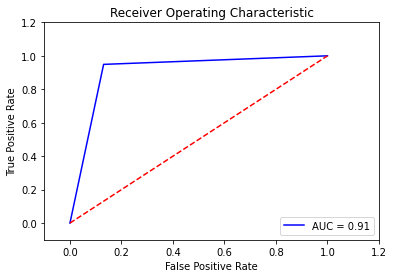

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(label_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 10. Test Prediction

Now we can use our train model to predict for the test data set and distribute probability on the predictions. 

In [45]:
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [0]:
test = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))

Here we check if the test data set has the same schema:

In [47]:
test.head().transpose()

0  ...              4
Accident_Index                               201401BS70277  ...  201401BS70281
Location_Easting_OSGR                               524590  ...         523520
Location_Northing_OSGR                              181280  ...         181060
Longitude                                        -0.205789  ...      -0.221279
Latitude                                           51.5167  ...        51.5149
Police_Force                                             1  ...              1
Accident_Severity                                        3  ...              2
Number_of_Vehicles                                       1  ...              1
Number_of_Casualties                                     1  ...              1
Date                                            01/05/2014  ...     05/05/2014
Day_of_Week                                              5  ...              2
Time                                                 12:40  ...          18:00
Local_Authority_(District)                              12  ...             11
Local_Authority_(Highway)                        E09000020  ...      E09000013
1st_Road_Class                                           4  ...              3
1st_Road_Number                                        412  ...           3220
Road_Type                                                6  ...              3
Speed_limit                                             30  ...             40
Junction_Detail                                          6  ...              1
Junction_Control                                         2  ...              4
2nd_Road_Class                                           6  ...              3
2nd_Road_Number                                          0  ...             40
Pedestrian_Crossing-Human_Control                        0  ...              0
Pedestrian_Crossing-Physical_Facilities                  5  ...              0
Light_Conditions                                         1  ...              1
Weather_Conditions                                       2  ...              1
Road_Surface_Conditions                                 -1  ...             -1
Special_Conditions_at_Site                               0  ...              0
Carriageway_Hazards                                      0  ...              0
Urban_or_Rural_Area                                      1  ...              1
Did_Police_Officer_Attend_Scene_of_Accident            NaN  ...            NaN
LSOA_of_Accident_Location                        E01002831  ...      E01002877

[32 rows x 5 columns]

a quick check on data types:

In [48]:
test.dtypes

Accident_Index                                  object
Location_Easting_OSGR                            int64
Location_Northing_OSGR                           int64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                        int64
Speed_limit                                      int64
Junction_D

In [49]:
test.shape

(12303, 32)

we just make the changes that we made to our training data set so the test data set will have the same shape as trainining data set. 

In [0]:
test=test.rename(columns={"Did_Police_Officer_Attend_Scene_of_Accident": "Police_attend?" })

In [0]:
df_test=test.drop(columns=['Accident_Index','Location_Easting_OSGR','Location_Northing_OSGR','Date','Time','LSOA_of_Accident_Location','Local_Authority_(Highway)','Police_attend?'])

In [54]:
df_test.head().transpose()

0  ...            4
Longitude                                 -0.205789  ...    -0.221279
Latitude                                  51.516658  ...    51.514916
Police_Force                               1.000000  ...     1.000000
Accident_Severity                          3.000000  ...     2.000000
Number_of_Vehicles                         1.000000  ...     1.000000
Number_of_Casualties                       1.000000  ...     1.000000
Day_of_Week                                5.000000  ...     2.000000
Local_Authority_(District)                12.000000  ...    11.000000
1st_Road_Class                             4.000000  ...     3.000000
1st_Road_Number                          412.000000  ...  3220.000000
Road_Type                                  6.000000  ...     3.000000
Speed_limit                               30.000000  ...    40.000000
Junction_Detail                            6.000000  ...     1.000000
Junction_Control                           2.000000  ...     4.000000
2nd_Road_Class                             6.000000  ...     3.000000
2nd_Road_Number                            0.000000  ...    40.000000
Pedestrian_Crossing-Human_Control          0.000000  ...     0.000000
Pedestrian_Crossing-Physical_Facilities    5.000000  ...     0.000000
Light_Conditions                           1.000000  ...     1.000000
Weather_Conditions                         2.000000  ...     1.000000
Road_Surface_Conditions                   -1.000000  ...    -1.000000
Special_Conditions_at_Site                 0.000000  ...     0.000000
Carriageway_Hazards                        0.000000  ...     0.000000
Urban_or_Rural_Area                        1.000000  ...     1.000000
Police_attend?                                  NaN  ...          NaN

[25 rows x 5 columns]

In [65]:
data_train.shape

(136029, 24)

In [66]:
df_test.shape

(12303, 24)

Now that our test data set has the same shape we can preict if police attend the scene or not.

Please Note that if a data point is classified as 0 it means that it has a value of Did_Police_Officer_Attend_Scene_of_Accident =1 and if a data point is classified as 1 it means that it has a value of Did_Police_Officer_Attend_Scene_of_Accident=2. 

In [0]:
pred_test=rfc_ht.predict(df_test)

In [0]:
probab=rfc_ht.predict_proba(df_test)

In [0]:
pred = pd.DataFrame(pred_test, columns=['predictions'])

In [0]:
final=pred.merge(pd.DataFrame(probab), left_index=True, right_index=True)

In [72]:
final.head()

predictions       0       1
0            0  0.8900  0.1100
1            0  0.7200  0.2800
2            0  0.5475  0.4525
3            0  0.9325  0.0675
4            0  0.8100  0.1900

Now we merge our prediction with the original test data on index:

In [0]:
test=test.merge(final,left_index=True,right_index=True)

In [74]:
test.head().transpose()

0  ...              4
Accident_Index                           201401BS70277  ...  201401BS70281
Location_Easting_OSGR                           524590  ...         523520
Location_Northing_OSGR                          181280  ...         181060
Longitude                                    -0.205789  ...      -0.221279
Latitude                                       51.5167  ...        51.5149
Police_Force                                         1  ...              1
Accident_Severity                                    3  ...              2
Number_of_Vehicles                                   1  ...              1
Number_of_Casualties                                 1  ...              1
Date                                        01/05/2014  ...     05/05/2014
Day_of_Week                                          5  ...              2
Time                                             12:40  ...          18:00
Local_Authority_(District)                          12  ...             11
Local_Authority_(Highway)                    E09000020  ...      E09000013
1st_Road_Class                                       4  ...              3
1st_Road_Number                                    412  ...           3220
Road_Type                                            6  ...              3
Speed_limit                                         30  ...             40
Junction_Detail                                      6  ...              1
Junction_Control                                     2  ...              4
2nd_Road_Class                                       6  ...              3
2nd_Road_Number                                      0  ...             40
Pedestrian_Crossing-Human_Control                    0  ...              0
Pedestrian_Crossing-Physical_Facilities              5  ...              0
Light_Conditions                                     1  ...              1
Weather_Conditions                                   2  ...              1
Road_Surface_Conditions                             -1  ...             -1
Special_Conditions_at_Site                           0  ...              0
Carriageway_Hazards                                  0  ...              0
Urban_or_Rural_Area                                  1  ...              1
Police_attend?                                     NaN  ...            NaN
LSOA_of_Accident_Location                    E01002831  ...      E01002877
predictions                                          0  ...              0
0                                                 0.89  ...           0.81
1                                                 0.11  ...           0.19

[35 rows x 5 columns]

In [75]:
test.shape

(12303, 35)

In [0]:
test.to_csv('VFtest_prob.csv')

# 11. Time Series

since we have a data and a time column it would be interesting to analysis the data set using time-series and try to predict the number of accidents in the future. 

Here I used Facebook Prophet library which is time-series based on Fourier Series in terms of seasonality. Prophet also take advantage of Hamiltonian Monte Carlo to estimate the parameters uncertainty. 

In [77]:
df.head().transpose()

0  ...                    4
Accident_Index                                 201301BS70003  ...        201301BS70009
Location_Easting_OSGR                                 527060  ...               525450
Location_Northing_OSGR                                177970  ...               178660
Longitude                                          -0.171402  ...            -0.194332
Latitude                                             51.4864  ...              51.4929
Police_Force                                               1  ...                    1
Accident_Severity                                          2  ...                    3
Number_of_Vehicles                                         2  ...                    2
Number_of_Casualties                                       1  ...                    1
Date                                     2013-01-02 00:00:00  ...  2013-01-04 00:00:00
Day_of_Week                                                4  ...                    6
Time                                                   09:08  ...                17:47
Local_Authority_(District)                                12  ...                   12
Local_Authority_(Highway)                          E09000020  ...            E09000020
1st_Road_Class                                             3  ...                    3
1st_Road_Number                                         3217  ...                 3220
Road_Type                                                  6  ...                    2
Speed_limit                                               30  ...                   30
Junction_Detail                                            3  ...                    3
Junction_Control                                           4  ...                    4
2nd_Road_Class                                             6  ...                    6
2nd_Road_Number                                            0  ...                    0
Pedestrian_Crossing-Human_Control                          0  ...                    0
Pedestrian_Crossing-Physical_Facilities                    0  ...                    0
Light_Conditions                                           1  ...                    4
Weather_Conditions                                         1  ...                    1
Road_Surface_Conditions                                    1  ...                    1
Special_Conditions_at_Site                                 0  ...                    0
Carriageway_Hazards                                        0  ...                    0
Urban_or_Rural_Area                                        1  ...                    1
Police_attend?                                             1  ...                    1
LSOA_of_Accident_Location                          E01002844  ...            E01002851
Datetime                                 2013-01-02 09:08:00  ...  2013-01-04 17:47:00

[33 rows x 5 columns]

We first need to create the dateframe that is acceptable by Prophet. For this purpose we need a ds (datetime) column and a y (response) column. We already have our datetime column we just need to rename it. Howevre for the y column we need to calculate the number of accident for each day. 

In [0]:
df_ts = pd.DataFrame(df['Datetime'].value_counts().reset_index().values, columns=["Datetime", "Number_of_Accident"])

In [105]:
df_ts.head()

Datetime Number_of_Accident
0 2013-11-07 08:30:00                 12
1 2013-02-19 18:00:00                 12
2 2013-07-05 17:00:00                 12
3 2013-08-15 17:30:00                 11
4 2013-04-23 18:00:00                 11

In [107]:
df_ts = df_ts.sort_values('Datetime')
df_ts.isnull().sum()

Datetime              0
Number_of_Accident    0
dtype: int64

In [0]:
df_ts = df_ts.groupby('Datetime')['Number_of_Accident'].sum().reset_index()

In [109]:
df_ts = df_ts.set_index('Datetime')
df_ts.index

DatetimeIndex(['2013-01-01 00:15:00', '2013-01-01 00:26:00',
               '2013-01-01 00:30:00', '2013-01-01 00:31:00',
               '2013-01-01 00:33:00', '2013-01-01 00:40:00',
               '2013-01-01 00:44:00', '2013-01-01 00:50:00',
               '2013-01-01 00:56:00', '2013-01-01 01:00:00',
               ...
               '2013-12-31 22:48:00', '2013-12-31 22:58:00',
               '2013-12-31 23:00:00', '2013-12-31 23:03:00',
               '2013-12-31 23:30:00', '2013-12-31 23:34:00',
               '2013-12-31 23:40:00', '2013-12-31 23:45:00',
               '2013-12-31 23:55:00', '2013-12-31 23:57:00'],
              dtype='datetime64[ns]', name='Datetime', length=92338, freq=None)

In [0]:
y = df_ts['Number_of_Accident'].resample('MS').mean()

In [112]:
y[2013:]

Series([], Freq: MS, Name: Number_of_Accident, dtype: float64)

The figure below shows the fluctuation of the number of accidents during 2013. As can be seen, the pick occured in November while we had the lowest number of accident in April. 

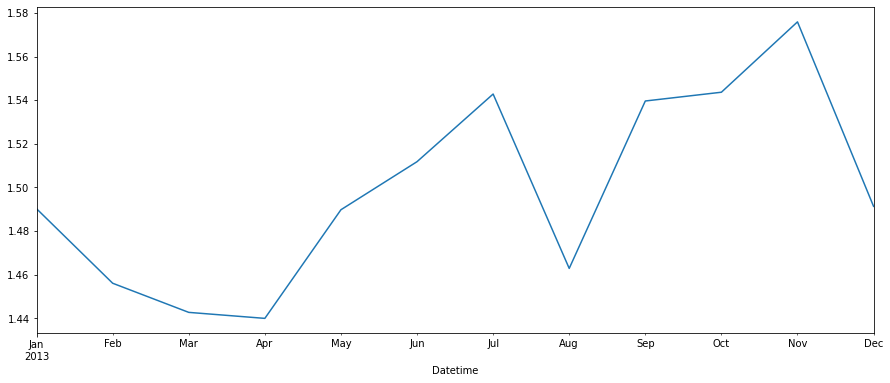

In [113]:
y.plot(figsize=(15, 6))
plt.show()

In [120]:
df_ts = df_ts.rename(columns={'Datetime': 'ds','Number_of_Accident': 'y'}) #renaming the column to be match with the format acceptable by Prophet
df_ts.head()

ds   y
0 2013-11-07 08:30:00  12
1 2013-02-19 18:00:00  12
2 2013-07-05 17:00:00  12
3 2013-08-15 17:30:00  11
4 2013-04-23 18:00:00  11

In [121]:
model = Prophet(interval_width=0.95)
model.fit(df_ts) #fitting the time-series

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Figure below shows the prediction for the future accident. As we only had data for 1 year the prediction can have high degree of error. 

<Figure size 1296x432 with 0 Axes>

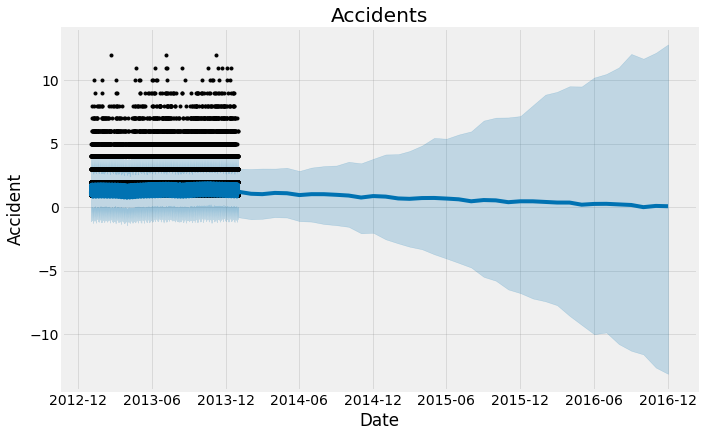

In [123]:
forecast = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(forecast)

plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Accident')
plt.title('Accidents');

One of the interesting thing in time-series is that we can dis-integrate the series into its constituents. 

Here we can see that for example:

1- The trend is almost flat. So it is expected to continue that path however it can go up and down based on the current data.
2- Weekly figure shows that Sat has the highest number of accidents while Sun has the lowest which we already observed during the initial analysis.
3. The most inetersting part is maybe the Daily figure where we can see around 8:00 and 17:00 we have the highest number of accident (maybe because people commute to work/home). 

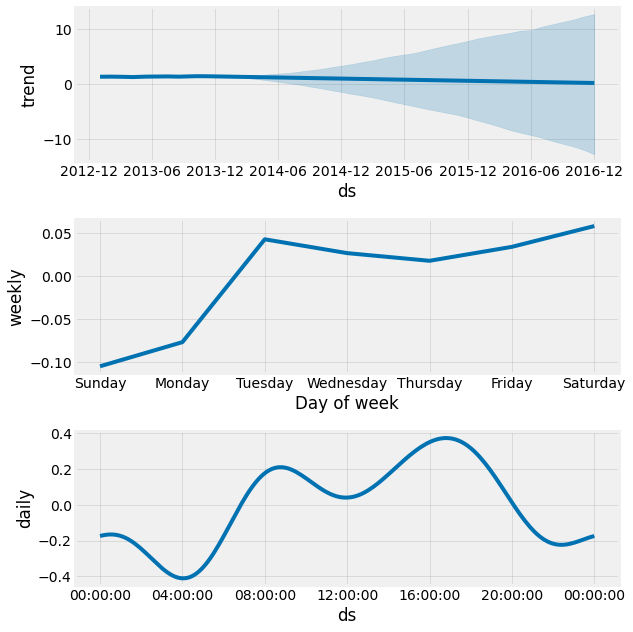

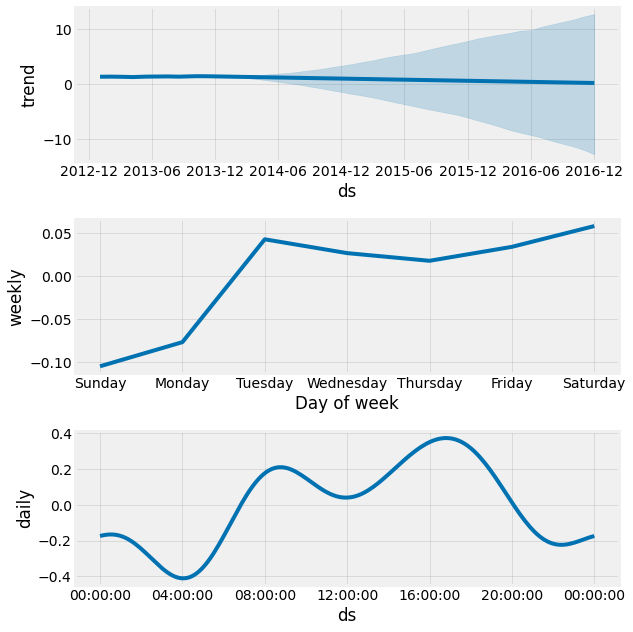

In [125]:
model.plot_components(forecast)

# 12. Conclusion

1. We carried some statistical and geospatial analysis to understand the data set.

2- We performed the classification task using random forest to predict whether a police attends a scene of accident. We realised that our data set is imbalance and that deteriorated the performance of our algorithm significantly. We use the upsampling method and artificially generate examples for minority class to balance the data set. We observed that this enhanced the performance significantly. We also carried our hyperparameters tunning and used the optimal parameters in our algorithm which again enhance the performance metrics slightly. We also carried out feature importance analysis.

3- We tried to use that tunned algorithm but this time with only the top 10 important featues. We understood that the model can still predict very well. 

4- We carried out time-series analysis in order to predict the future accident during various time of the year. Our component analysis shows that Saturday has the highest number of accident. We also realised most accidents take place at 8:00am and 17:00pm.  

# 13. Future Work!

If I had more time I would probably try the following tasks:

1-Try to acquire more data from different data source such GPS/traffic maps.

2- Develop a Convolutional neural network to extract information regarding traffic from the Google Map.

3- Try to use numpy arrays instead of Pandas which decreases the computation time significantly as numpy arrays are tensors which makes the mathematical claculations much faster. 

4- Try to develop a data dictionary.

5- Try different balancing method such as SMOTE or clustering-based upsampling.

6- Try to use various ensamble methods as well as neural network methods and compare their performances.
